In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
qvi_data = pd.read_csv('/content/QVI_data.csv')
qvi_data.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


In [ ]:
qvi_data.shape

(264834, 12)

In [ ]:
qvi_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [ ]:
qvi_data['DATE'] = pd.to_datetime(qvi_data['DATE'], format= '%Y-%m-%d')
qvi_data['MONTH_ID']  = qvi_data['DATE'].dt.strftime('%Y%m').astype('int')
qvi_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


Creating metrices for each store and month calculate total sales, number of customers,transactions per customer, chips per customer and the average price per unit.

In [ ]:
TOT_SALE_M = qvi_data.groupby(['STORE_NBR', 'MONTH_ID'])['TOT_SALES'].sum()

In [ ]:
TOT_CUST_M = qvi_data.groupby(['STORE_NBR', 'MONTH_ID'])['LYLTY_CARD_NBR'].nunique()

In [ ]:
TRAN_CUST_M = qvi_data.groupby(['STORE_NBR', 'MONTH_ID'])['TXN_ID'].nunique()
TRAN_CUST_M = TRAN_CUST_M / TOT_CUST_M

In [ ]:
CHIP_CUST = qvi_data.groupby(['STORE_NBR', 'MONTH_ID'])['PROD_QTY'].sum()
CHIP_CUST = CHIP_CUST / TOT_CUST_M

In [ ]:
TOT_PROD = qvi_data.groupby(['STORE_NBR','MONTH_ID'])['PROD_QTY'].sum()
AVG_PR_U = TOT_SALE_M / TOT_PROD

In [ ]:
measureoverTime = pd.concat([TOT_SALE_M, TOT_CUST_M, TRAN_CUST_M, CHIP_CUST, AVG_PR_U],axis=1)
measureoverTime.columns = ["totSales", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"]
measureoverTime = measureoverTime.reset_index()
measureoverTime.head(10)

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
5,1,201812,189.6,42,1.119048,1.357143,3.326316
6,1,201901,154.8,35,1.028571,1.200000,3.685714
7,1,201902,225.4,52,1.057692,1.250000,3.467692
8,1,201903,192.9,45,1.088889,1.288889,3.325862
9,1,201904,192.9,42,1.023810,1.357143,3.384211


 Filtering to the pre-trial period and stores with full observation periods.

In [ ]:
observations = measureoverTime["STORE_NBR"].value_counts()
full_index = observations[observations == 12].index
storesWithFullObs = measureoverTime[measureoverTime['STORE_NBR'].isin(full_index)]
preTrialMeasures = storesWithFullObs[(storesWithFullObs['MONTH_ID'] < 201902)]
preTrialMeasures.reset_index(drop=True)

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...
1815,272,201809,304.7,32,1.125000,2.218750,4.291549
1816,272,201810,430.6,44,1.136364,2.250000,4.349495
1817,272,201811,376.2,41,1.097561,2.121951,4.324138
1818,272,201812,403.9,47,1.000000,1.893617,4.538202


Creating a function to calculate correlation for a measure, looping
through each control store.

In [ ]:
def calculateCorrelation(inputTable, metricCol, storeComparison) :
  comp_stores = inputTable[~inputTable['STORE_NBR'].isin([77, 86, 88])]
  trial_stores = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
  calcCorrTable = pd.DataFrame(columns = ["Control_Store", "Trial_Store", "Corr"])

  for i in comp_stores["STORE_NBR"].unique():
        control = comp_stores[comp_stores["STORE_NBR"]==i][metricCol].reset_index()
        correlation = control.corrwith(trial_stores,axis=0)[1]
        calcCorrTable_i = pd.DataFrame({"Control_Store":i,"Trial_Store":storeComparison,"Corr":[correlation]})
        calcCorrTable = pd.concat([calcCorrTable, calcCorrTable_i])

  return calcCorrTable

Creating a function to calculate a standardised magnitude distance for a
measure.

In [ ]:
def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):

    comp_stores = inputTable.loc[~inputTable["STORE_NBR"].isin([77,86,88])]
    trial_stores = inputTable.loc[inputTable["STORE_NBR"] == storeComparison].reset_index()[metricCol]
    calcDistTable = pd.DataFrame(columns=["Control_Store", "Trial_Store", "Magnitude"])

    for i in comp_stores["STORE_NBR"].unique():
        control = comp_stores[comp_stores["STORE_NBR"]==i].reset_index()[metricCol]
        diff = abs(trial_stores - control)
        s_diff = np.mean(1-((diff-min(diff))/(max(diff)-min(diff))))
        calcDistTable_i = pd.DataFrame({"Control_Store":i,"Trial_Store":[storeComparison],"Magnitude": s_diff})
        calcDistTable = pd.concat([calcDistTable, calcDistTable_i])
    return calcDistTable

In [ ]:
corr_nSales_77 = calculateCorrelation(preTrialMeasures,"totSales",77)
magnitude_nSales_77 = calculateMagnitudeDistance(preTrialMeasures,"totSales",77)
corr_nCustomers_77 = calculateCorrelation(preTrialMeasures,"nCustomers",77)
magnitude_nCustomers_77 = calculateMagnitudeDistance(preTrialMeasures,"nCustomers",77)

In [ ]:
nSales_77_merged = pd.concat([corr_nSales_77,magnitude_nSales_77],axis=1)
nSales_77_merged["score_nSales"] = 0.5 * nSales_77_merged["Corr"] + (1-0.5) * nSales_77_merged["Magnitude"]
nSales_77_merged.head(10)

,Control_Store,Trial_Store,Corr,Control_Store,Trial_Store,Magnitude,score_nSales
0,1,77,0.075218,1,77,0.408163,0.241691
0,2,77,-0.263079,2,77,0.590119,0.163520
0,3,77,0.806644,3,77,0.522914,0.664779
0,4,77,-0.263300,4,77,0.644934,0.190817
0,5,77,-0.110652,5,77,0.516320,0.202834
0,6,77,0.042490,6,77,0.622226,0.332358
0,7,77,-0.193886,7,77,0.423680,0.114897
0,8,77,-0.307360,8,77,0.621858,0.157249
0,9,77,-0.702976,9,77,0.414734,-0.144121
0,10,77,-0.040008,10,77,0.471165,0.215578


In [ ]:
nCustomers_77_merged = pd.concat([corr_nCustomers_77,magnitude_nCustomers_77],axis=1)
nCustomers_77_merged["score_nCustomers"] = 0.5 * nCustomers_77_merged["Corr"] + (1-0.5) * nCustomers_77_merged["Magnitude"]
nCustomers_77_merged.head(10)

,Control_Store,Trial_Store,Corr,Control_Store,Trial_Store,Magnitude,score_nCustomers
0,1,77,0.322168,1,77,0.663866,0.493017
0,2,77,-0.572051,2,77,0.471429,-0.050311
0,3,77,0.834207,3,77,0.489796,0.662002
0,4,77,-0.295639,4,77,0.498258,0.101310
0,5,77,0.370659,5,77,0.512605,0.441632
0,6,77,0.136856,6,77,0.600000,0.368428
0,7,77,-0.310977,7,77,0.389610,0.039317
0,8,77,-0.410357,8,77,0.441558,0.015601
0,9,77,-0.785699,9,77,0.611429,-0.087135
0,10,77,0.112178,10,77,0.530612,0.321395


In [ ]:
score_Control_77 = pd.concat([nSales_77_merged[["Control_Store", "Trial_Store", "score_nSales"]],nCustomers_77_merged["score_nCustomers"]],axis=1)

In [ ]:
score_Control_77["finalControlScore"] = 0.5 * score_Control_77["score_nSales"] + (1-0.5) * score_Control_77["score_nCustomers"]
score_Control_77

,Control_Store,Control_Store,Trial_Store,Trial_Store,score_nSales,score_nCustomers,finalControlScore
0,1,1,77,77,0.241691,0.493017,0.367354
0,2,2,77,77,0.163520,-0.050311,0.056604
0,3,3,77,77,0.664779,0.662002,0.663390
0,4,4,77,77,0.190817,0.101310,0.146064
0,5,5,77,77,0.202834,0.441632,0.322233
...,...,...,...,...,...,...,...
0,268,268,77,77,0.387272,0.470473,0.428872
0,269,269,77,77,0.121684,0.005090,0.063387
0,270,270,77,77,0.453489,0.202710,0.328100
0,271,271,77,77,0.348289,0.174100,0.261195


In [ ]:
score_Control_77.sort_values(by='finalControlScore',ascending=False).head()

,Control_Store,Control_Store,Trial_Store,Trial_Store,score_nSales,score_nCustomers,finalControlScore
0,233,233,77,77,0.697290,0.816607,0.756949
0,71,71,77,77,0.789497,0.663123,0.726310
0,84,84,77,77,0.656972,0.715000,0.685986
0,119,119,77,77,0.636046,0.729729,0.682887
0,115,115,77,77,0.708347,0.645155,0.676751


In [ ]:
measureoverTimeSales = measureoverTime

In [ ]:
pastSales = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 77, 'Trial', np.where(x['STORE_NBR'] == 233, 'Control', 'Other Stores')))

In [ ]:
pastSales.head(10)

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type
0,1,201807,206.9,49,1.061224,1.265306,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.285714,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.271186,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.318182,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.239130,3.378947,Other Stores
5,1,201812,189.6,42,1.119048,1.357143,3.326316,Other Stores
6,1,201901,154.8,35,1.028571,1.200000,3.685714,Other Stores
7,1,201902,225.4,52,1.057692,1.250000,3.467692,Other Stores
8,1,201903,192.9,45,1.088889,1.288889,3.325862,Other Stores
9,1,201904,192.9,42,1.023810,1.357143,3.384211,Other Stores


In [ ]:
pastSales['YearMonth'] = pd.to_datetime(pastSales['MONTH_ID'], format='%Y%m')
pastSales

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type,YearMonth
0,1,201807,206.9,49,1.061224,1.265306,3.337097,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,1.285714,3.261111,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,1.271186,3.717333,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,1.318182,3.243103,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,1.239130,3.378947,Other Stores,2018-11-01
...,...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,4.346154,Other Stores,2019-02-01
3165,272,201903,442.3,50,1.060000,2.020000,4.379208,Other Stores,2019-03-01
3166,272,201904,445.1,54,1.018519,1.944444,4.239048,Other Stores,2019-04-01
3167,272,201905,314.6,34,1.176471,2.088235,4.430986,Other Stores,2019-05-01


In [ ]:
pastSales = pastSales.groupby(['YearMonth', 'Store_type']).agg(totSales = ('totSales', 'mean')).reset_index()
pastSales

,YearMonth,Store_type,totSales
0,2018-07-01,Control,290.700000
1,2018-07-01,Other Stores,623.817424
2,2018-07-01,Trial,296.800000
3,2018-08-01,Control,285.900000
4,2018-08-01,Other Stores,603.600192
5,2018-08-01,Trial,255.500000
6,2018-09-01,Control,228.600000
7,2018-09-01,Other Stores,610.947328
8,2018-09-01,Trial,225.200000
9,2018-10-01,Control,185.700000


Text(48.447177083333315, 0.5, 'Total sales')

<Figure size 2000x1000 with 0 Axes>

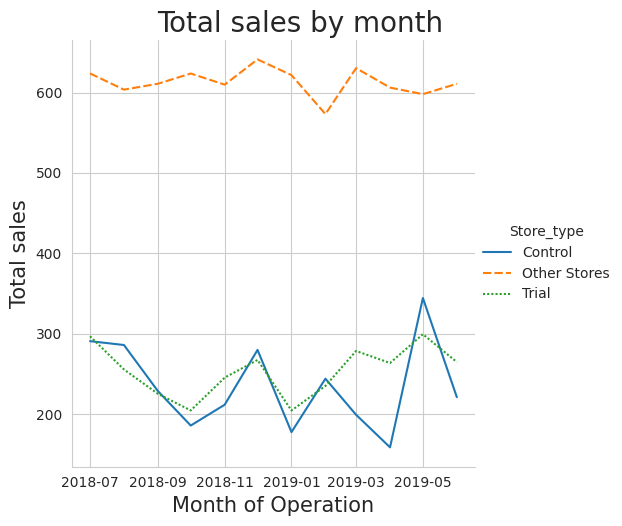

In [ ]:
plt.figure(figsize=(20,10))
fig1 = sns.relplot(kind='line', data=pastSales,x='YearMonth',y='totSales', hue = 'Store_type',style='Store_type',errorbar=None)
fig1.fig.suptitle("Total sales by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total sales",fontsize=15)

In [ ]:
measureoverTimeCusts = measureoverTime
measureoverTimeCusts.head()

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


In [ ]:
pastCustomers = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 77, 'Trial', np.where(x['STORE_NBR'] == 233, 'Control', 'Other Stores')))
pastCustomers['YearMonth'] = pd.to_datetime(pastCustomers['MONTH_ID'], format='%Y%m')
pastCustomers = pastCustomers.groupby(['YearMonth', 'Store_type']).agg(nCustomers = ('nCustomers', 'mean')).reset_index()
pastCustomers.head(10)

,YearMonth,Store_type,nCustomers
0,2018-07-01,Control,51.000000
1,2018-07-01,Other Stores,70.750000
2,2018-07-01,Trial,51.000000
3,2018-08-01,Control,48.000000
4,2018-08-01,Other Stores,71.352490
5,2018-08-01,Trial,47.000000
6,2018-09-01,Control,42.000000
7,2018-09-01,Other Stores,69.110687
8,2018-09-01,Trial,42.000000
9,2018-10-01,Control,35.000000


Text(46.038739583333324, 0.5, 'Total Customers')

<Figure size 2000x1000 with 0 Axes>

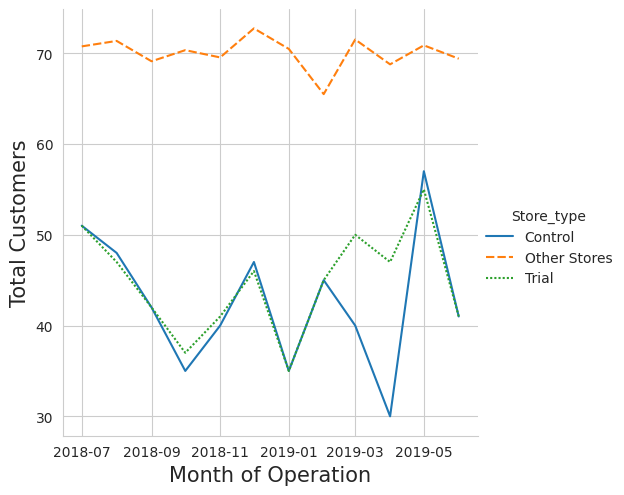

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig2 = sns.relplot(kind='line', data=pastCustomers,x='YearMonth',y='nCustomers', hue = 'Store_type',style='Store_type')
fig1.fig.suptitle("Total Customers by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Customers",fontsize=15)

*For Store 86*

In [ ]:
corr_nSales_86 = calculateCorrelation(preTrialMeasures,"totSales",86)

magnitude_nSales_86 = calculateMagnitudeDistance(preTrialMeasures,"totSales",86)

corr_nCustomers_86 = calculateCorrelation(preTrialMeasures,"nCustomers",86)

magnitude_nCustomers_86 = calculateMagnitudeDistance(preTrialMeasures,"nCustomers",86)

In [ ]:
nSales_86_merged = pd.concat([corr_nSales_86,magnitude_nSales_86],axis=1)
nSales_86_merged["score_nSales"] = 0.5 * nSales_86_merged["Corr"] + (1-0.5) * nSales_86_merged["Magnitude"]
nSales_86_merged

,Control_Store,Trial_Store,Corr,Control_Store,Trial_Store,Magnitude,score_nSales
0,1,86,0.445632,1,86,0.488334,0.466983
0,2,86,-0.403835,2,86,0.321131,-0.041352
0,3,86,-0.261284,3,86,0.507515,0.123116
0,4,86,-0.039035,4,86,0.635654,0.298309
0,5,86,0.235159,5,86,0.579835,0.407497
...,...,...,...,...,...,...,...
0,268,86,-0.452182,268,86,0.291930,-0.080126
0,269,86,0.697055,269,86,0.480267,0.588661
0,270,86,-0.730679,270,86,0.517014,-0.106832
0,271,86,0.527637,271,86,0.565665,0.546651


In [ ]:
nCustomers_86_merged = pd.concat([corr_nCustomers_86,magnitude_nCustomers_86],axis=1)
nCustomers_86_merged["score_nCustomers"] = 0.5 * nCustomers_86_merged["Corr"] + (1-0.5) * nCustomers_86_merged["Magnitude"]
nCustomers_86_merged

,Control_Store,Trial_Store,Corr,Control_Store,Trial_Store,Magnitude,score_nCustomers
0,1,86,0.485831,1,86,0.510204,0.498018
0,2,86,-0.086161,2,86,0.428571,0.171205
0,3,86,-0.353786,3,86,0.563025,0.104620
0,4,86,-0.169608,4,86,0.537815,0.184103
0,5,86,-0.253229,5,86,0.714286,0.230528
...,...,...,...,...,...,...,...
0,268,86,-0.034273,268,86,0.566327,0.266027
0,269,86,-0.098587,269,86,0.581633,0.241523
0,270,86,-0.767267,270,86,0.650794,-0.058237
0,271,86,0.267393,271,86,0.598214,0.432804


In [ ]:
score_Control_86 = pd.concat([nSales_86_merged[["Control_Store", "Trial_Store", "score_nSales"]],nCustomers_86_merged["score_nCustomers"]],axis=1)

In [ ]:
score_Control_86["finalControlScore"] = 0.5 * score_Control_86["score_nSales"] + (1-0.5) * score_Control_86["score_nCustomers"]
score_Control_86.sort_values(by='finalControlScore',ascending=False).head()

,Control_Store,Control_Store,Trial_Store,Trial_Store,score_nSales,score_nCustomers,finalControlScore
0,155,155,86,86,0.808106,0.733343,0.770724
0,109,109,86,86,0.697120,0.742532,0.719826
0,114,114,86,86,0.631393,0.663384,0.647389
0,225,225,86,86,0.601841,0.684356,0.643099
0,138,138,86,86,0.593296,0.660565,0.626930


Now we have the Trial Store 86 and Control Store 155

In [ ]:
measureoverTimeSales = measureoverTime

In [ ]:
pastSales_86 = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 86, 'Trial', np.where(x['STORE_NBR'] == 155, 'Control', 'Other Stores')))
pastSales_86['YearMonth'] = pd.to_datetime(pastSales_86['MONTH_ID'], format='%Y%m')
pastSales_86 = pastSales_86.groupby(['YearMonth', 'Store_type']).agg(totSales = ('totSales', 'mean')).reset_index()


Text(50.855614583333335, 0.5, 'Total sales')

<Figure size 2000x1000 with 0 Axes>

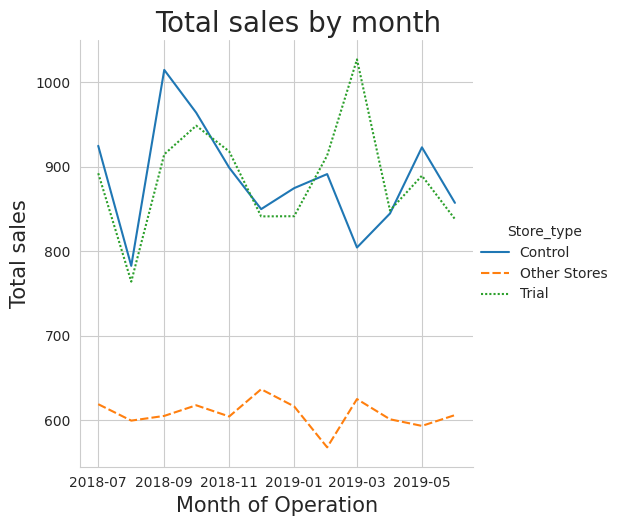

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig3 = sns.relplot(kind='line', data=pastSales_86,x='YearMonth',y='totSales', hue = 'Store_type',style='Store_type')
fig3.fig.suptitle("Total sales by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total sales",fontsize=15)

In [ ]:
measureoverTimeCusts = measureoverTime

In [ ]:
pastCustomers_86 = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 86, 'Trial', np.where(x['STORE_NBR'] == 155, 'Control', 'Other Stores')))
pastCustomers_86['YearMonth'] = pd.to_datetime(pastCustomers_86['MONTH_ID'], format='%Y%m')
pastCustomers_86 = pastCustomers_86.groupby(['YearMonth', 'Store_type']).agg(nCustomers = ('nCustomers', 'mean')).reset_index()
pastCustomers.head(10)

,YearMonth,Store_type,nCustomers
0,2018-07-01,Control,51.000000
1,2018-07-01,Other Stores,70.750000
2,2018-07-01,Trial,51.000000
3,2018-08-01,Control,48.000000
4,2018-08-01,Other Stores,71.352490
5,2018-08-01,Trial,47.000000
6,2018-09-01,Control,42.000000
7,2018-09-01,Other Stores,69.110687
8,2018-09-01,Trial,42.000000
9,2018-10-01,Control,35.000000


Text(48.48158333333332, 0.5, 'Total Customers')

<Figure size 2000x1000 with 0 Axes>

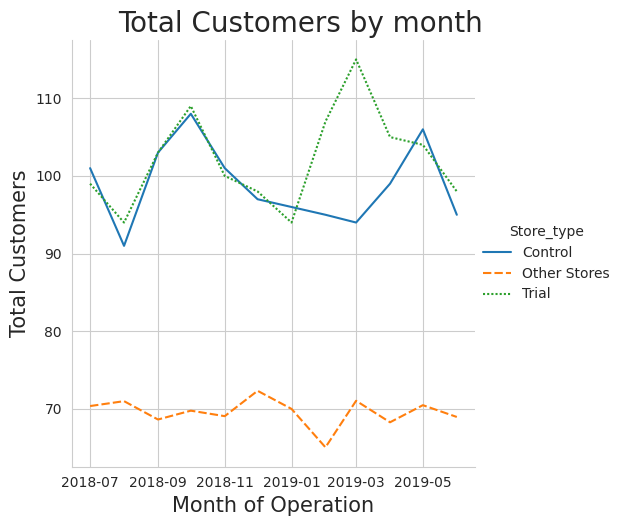

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig4 = sns.relplot(kind='line', data=pastCustomers_86,x='YearMonth',y='nCustomers', hue = 'Store_type',style='Store_type')
fig4.fig.suptitle("Total Customers by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Customers",fontsize=15)

*For Store 88*

In [ ]:
corr_nSales_88 = calculateCorrelation(preTrialMeasures,"totSales",88)
magnitude_nSales_88 = calculateMagnitudeDistance(preTrialMeasures,"totSales",88)
corr_nCustomers_88 = calculateCorrelation(preTrialMeasures,"nCustomers",88)
magnitude_nCustomers_88 = calculateMagnitudeDistance(preTrialMeasures,"nCustomers",88)

In [ ]:
nSales_88_merged = pd.concat([corr_nSales_88,magnitude_nSales_88['Magnitude']],axis=1)
nSales_88_merged["score_nSales"] = 0.5 * nSales_88_merged["Corr"] + 0.5 * nSales_88_merged["Magnitude"]
nSales_88_merged

,Control_Store,Trial_Store,Corr,Magnitude,score_nSales
0,1,88,0.813636,0.548959,0.681297
0,2,88,-0.067927,0.541212,0.236643
0,3,88,-0.507847,0.458109,-0.024869
0,4,88,-0.745566,0.484447,-0.130559
0,5,88,0.190330,0.496409,0.343370
...,...,...,...,...,...
0,268,88,-0.021429,0.522847,0.250709
0,269,88,-0.172578,0.564856,0.196139
0,270,88,-0.723272,0.513329,-0.104971
0,271,88,-0.103037,0.429220,0.163091


In [ ]:
nCustomers_88_merged = pd.concat([corr_nCustomers_88,magnitude_nCustomers_88['Magnitude']],axis=1)
nCustomers_88_merged["score_nCustomers"] = 0.5 * nCustomers_88_merged["Corr"] + 0.5 * nCustomers_88_merged["Magnitude"]
nCustomers_88_merged

,Control_Store,Trial_Store,Corr,Magnitude,score_nCustomers
0,1,88,0.305334,0.357143,0.331238
0,2,88,-0.452379,0.285714,-0.083332
0,3,88,0.522884,0.683673,0.603279
0,4,88,-0.361503,0.577922,0.108210
0,5,88,-0.025320,0.558442,0.266561
...,...,...,...,...,...
0,268,88,0.672672,0.630252,0.651462
0,269,88,-0.274781,0.360902,0.043061
0,270,88,-0.103032,0.367965,0.132467
0,271,88,-0.018831,0.655844,0.318507


In [ ]:
score_Control_88 = pd.concat([nSales_88_merged[["Control_Store", "Trial_Store", "score_nSales"]],nCustomers_88_merged["score_nCustomers"]],axis=1)

In [ ]:
score_Control_88["finalControlScore"] = 0.5 * score_Control_88["score_nSales"] + 0.5 * score_Control_88["score_nCustomers"]


In [ ]:
score_Control_88.sort_values(by='finalControlScore',ascending=False)

,Control_Store,Trial_Store,score_nSales,score_nCustomers,finalControlScore
0,178,88,0.650803,0.707828,0.679316
0,14,88,0.646064,0.685774,0.665919
0,134,88,0.775084,0.540154,0.657619
0,237,88,0.451974,0.777235,0.614604
0,187,88,0.616752,0.594560,0.605656
...,...,...,...,...,...
0,141,88,-0.111265,-0.057033,-0.084149
0,48,88,-0.174440,-0.050650,-0.112545
0,239,88,-0.109933,-0.123703,-0.116818
0,133,88,-0.119811,-0.175477,-0.147644


We have Trial Store 88 and Control Store 178

In [ ]:
measureoverTimeSales = measureoverTime

In [ ]:
pastSales_88 = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 88, 'Trial', np.where(x['STORE_NBR'] == 178, 'Control', 'Other Stores')))
pastSales_88['YearMonth'] = pd.to_datetime(pastSales_88['MONTH_ID'], format='%Y%m')
pastSales_88 = pastSales_88.groupby(['YearMonth', 'Store_type']).agg(totSales = ('totSales', 'mean')).reset_index()


Text(50.855614583333335, 0.5, 'Total sales')

<Figure size 2000x1000 with 0 Axes>

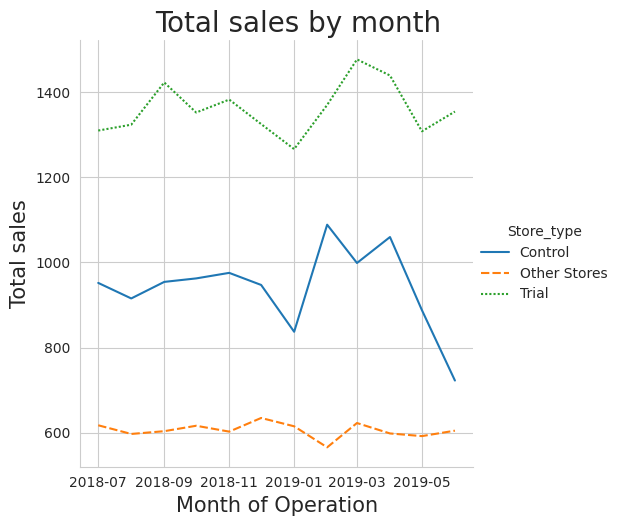

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig5 = sns.relplot(kind='line', data=pastSales_88,x='YearMonth',y='totSales', hue = 'Store_type',style='Store_type')
fig5.fig.suptitle("Total sales by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total sales",fontsize=15)

In [ ]:
measureoverTimeCusts = measureoverTime

In [ ]:
pastCustomers_88 = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 88, 'Trial', np.where(x['STORE_NBR'] == 178, 'Control', 'Other Stores')))
pastCustomers_88['YearMonth'] = pd.to_datetime(pastCustomers_88['MONTH_ID'], format='%Y%m')
pastCustomers_88 = pastCustomers_88.groupby(['YearMonth', 'Store_type']).agg(nCustomers = ('nCustomers', 'mean')).reset_index()
pastCustomers.head(10)

,YearMonth,Store_type,nCustomers
0,2018-07-01,Control,51.000000
1,2018-07-01,Other Stores,70.750000
2,2018-07-01,Trial,51.000000
3,2018-08-01,Control,48.000000
4,2018-08-01,Other Stores,71.352490
5,2018-08-01,Trial,47.000000
6,2018-09-01,Control,42.000000
7,2018-09-01,Other Stores,69.110687
8,2018-09-01,Trial,42.000000
9,2018-10-01,Control,35.000000


Text(48.48158333333332, 0.5, 'Total Customers')

<Figure size 2000x1000 with 0 Axes>

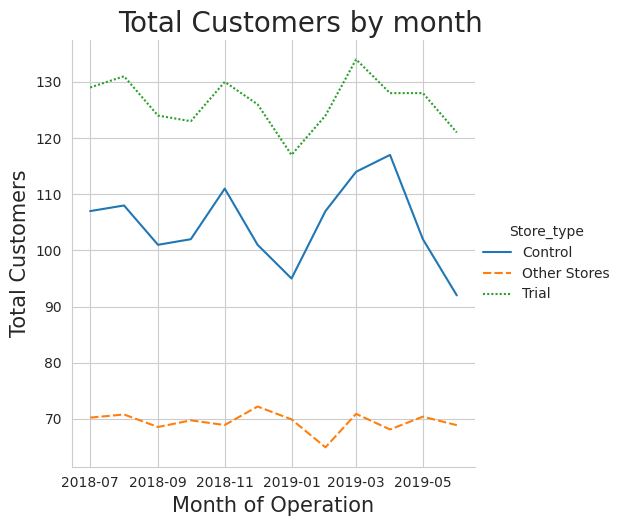

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig6 = sns.relplot(kind='line', data=pastCustomers_88,x='YearMonth',y='nCustomers', hue = 'Store_type',style='Store_type')
fig6.fig.suptitle("Total Customers by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Customers",fontsize=15)

The Visualization shows that Control Store 178 is not a good store for Trial Store 88

Let's try Store 237 as the Control Store.

In [ ]:
pastSales_88 = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 88, 'Trial', np.where(x['STORE_NBR'] == 237, 'Control', 'Other Stores')))
pastSales_88['YearMonth'] = pd.to_datetime(pastSales_88['MONTH_ID'], format='%Y%m')
pastSales_88 = pastSales_88.groupby(['YearMonth', 'Store_type']).agg(totSales = ('totSales', 'mean')).reset_index()


Text(50.855614583333335, 0.5, 'Total sales')

<Figure size 2000x1000 with 0 Axes>

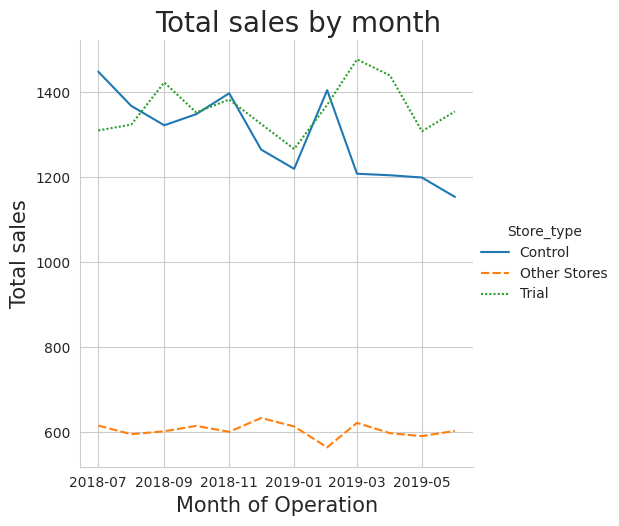

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig5 = sns.relplot(kind='line', data=pastSales_88,x='YearMonth',y='totSales', hue = 'Store_type',style='Store_type')
fig5.fig.suptitle("Total sales by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total sales",fontsize=15)

In [ ]:
measureoverTimeCusts = measureoverTime

In [ ]:
pastCustomers_88 = measureoverTimeSales.assign(Store_type = lambda x: np.where(x['STORE_NBR'] == 88, 'Trial', np.where(x['STORE_NBR'] == 237, 'Control', 'Other Stores')))
pastCustomers_88['YearMonth'] = pd.to_datetime(pastCustomers_88['MONTH_ID'], format='%Y%m')
pastCustomers_88 = pastCustomers_88.groupby(['YearMonth', 'Store_type']).agg(nCustomers = ('nCustomers', 'mean')).reset_index()
pastCustomers.head(10)

,YearMonth,Store_type,nCustomers
0,2018-07-01,Control,51.000000
1,2018-07-01,Other Stores,70.750000
2,2018-07-01,Trial,51.000000
3,2018-08-01,Control,48.000000
4,2018-08-01,Other Stores,71.352490
5,2018-08-01,Trial,47.000000
6,2018-09-01,Control,42.000000
7,2018-09-01,Other Stores,69.110687
8,2018-09-01,Trial,42.000000
9,2018-10-01,Control,35.000000


Text(48.48158333333332, 0.5, 'Total Customers')

<Figure size 2000x1000 with 0 Axes>

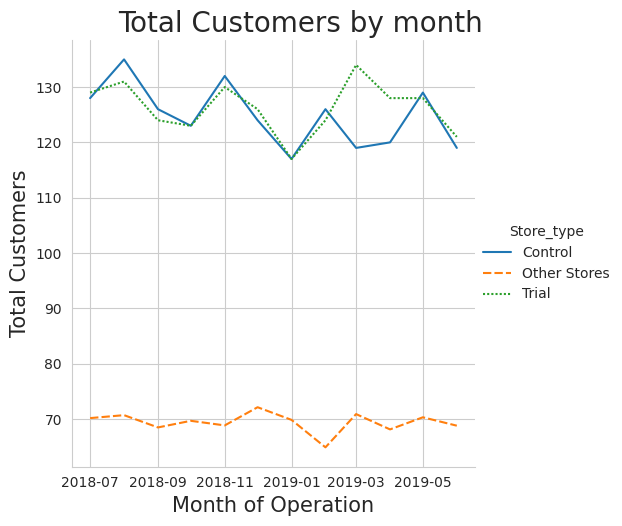

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
fig6 = sns.relplot(kind='line', data=pastCustomers_88,x='YearMonth',y='nCustomers', hue = 'Store_type',style='Store_type')
fig6.fig.suptitle("Total Customers by month", y=1.03,fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Customers",fontsize=15)

Store 237 gives good output as Control Store for Trial Store 88.

## *Assessment of trial*

In [ ]:
preTrialMeasures

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,2.218750,4.291549
3160,272,201810,430.6,44,1.136364,2.250000,4.349495
3161,272,201811,376.2,41,1.097561,2.121951,4.324138
3162,272,201812,403.9,47,1.000000,1.893617,4.538202


In [ ]:
scalingFactorForControlSales_77 = (preTrialMeasures[preTrialMeasures['STORE_NBR'] == 77]['totSales'].sum()) / (preTrialMeasures[preTrialMeasures['STORE_NBR']==233]['totSales'].sum())
scalingFactorForControlSales_77

1.023617303289553

In [ ]:
scaledControlSales_77 = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == 233)]
scaledControlSales_77

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
2699,233,201807,290.7,51,1.058824,1.725490,3.303409
2700,233,201808,285.9,48,1.041667,1.666667,3.573750
2701,233,201809,228.6,42,1.071429,1.666667,3.265714
2702,233,201810,185.7,35,1.028571,1.600000,3.316071
2703,233,201811,211.6,40,1.025000,1.550000,3.412903
2704,233,201812,279.8,47,1.063830,1.595745,3.730667
2705,233,201901,177.5,35,1.000000,1.342857,3.776596


In [ ]:

scaledControlSales_77["controlSales"] = scaledControlSales_77["totSales"] * scalingFactorForControlSales_77
scaledControlSales_77

<ipython-input-239-9e43c7d7223b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_77["controlSales"] = scaledControlSales_77["totSales"] * scalingFactorForControlSales_77


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
2699,233,201807,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.550000,3.412903,216.597421
2704,233,201812,279.8,47,1.063830,1.595745,3.730667,286.408121
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071


In [ ]:
scaledControlSales_77.reset_index(drop=True)

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
0,233,201807,290.7,51,1.058824,1.725490,3.303409,297.565550
1,233,201808,285.9,48,1.041667,1.666667,3.573750,292.652187
2,233,201809,228.6,42,1.071429,1.666667,3.265714,233.998916
3,233,201810,185.7,35,1.028571,1.600000,3.316071,190.085733
4,233,201811,211.6,40,1.025000,1.550000,3.412903,216.597421
5,233,201812,279.8,47,1.063830,1.595745,3.730667,286.408121
6,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071


In [ ]:
trialSales_77 = measureoverTime[measureoverTime['STORE_NBR'] == 77].reset_index(drop=True)
scaledControlSales_77 = scaledControlSales_77.reset_index(drop=True)
percentDiffS_77 = pd.concat([trialSales_77["MONTH_ID"],trialSales_77["totSales"],scaledControlSales_77["controlSales"]],axis=1)
percentDiffS_77.columns=["MONTH_ID","trialSales","controlSales"]
percentDiffS_77["percentDiffS"]= (abs(percentDiffS_77["trialSales"]-percentDiffS_77["controlSales"]))/percentDiffS_77["controlSales"]
percentDiffS_77

,MONTH_ID,trialSales,controlSales,percentDiffS
0,201807,296.8,297.565550,0.002573
1,201808,255.5,292.652187,0.126950
2,201809,225.2,233.998916,0.037602
3,201810,204.5,190.085733,0.075830
4,201811,245.3,216.597421,0.132516
5,201812,267.3,286.408121,0.066716
6,201901,204.4,181.692071,0.124980
7,201902,235.0,NaN,NaN
8,201903,278.5,NaN,NaN
9,201904,263.5,NaN,NaN


In [ ]:
stdS_77 = percentDiffS_77[percentDiffS_77["MONTH_ID"]<201902]["percentDiffS"].std()
stdS_77

0.04994076264142537

Note that there are 8 months in the pre-trial period
#### hence 8 - 1 = 7 degrees of freedom

In [ ]:
dof = 7

We will test with a null hypothesis of there being 0 difference between trial
and control stores.

The test statistic here is (x - u)/standard deviation

In [ ]:
percentDiffS_77['tValue'] = (percentDiffS_77['percentDiffS'] - 0) / stdS_77
percentDiffS_77

,MONTH_ID,trialSales,controlSales,percentDiffS,tValue
0,201807,296.8,297.565550,0.002573,0.051515
1,201808,255.5,292.652187,0.126950,2.542011
2,201809,225.2,233.998916,0.037602,0.752940
3,201810,204.5,190.085733,0.075830,1.518406
4,201811,245.3,216.597421,0.132516,2.653459
5,201812,267.3,286.408121,0.066716,1.335911
6,201901,204.4,181.692071,0.124980,2.502571
7,201902,235.0,NaN,NaN,NaN
8,201903,278.5,NaN,NaN,NaN
9,201904,263.5,NaN,NaN,NaN


In [ ]:
from scipy.stats import t


In [ ]:
t.ppf(0.975,df = dof)

2.3646242510102993

We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store.

Let's create a more visual version of this by plotting the sales of the control
store, the sales of the trial stores and the 95th percentile value of sales of the control store.

In [ ]:
measureoverTimeSales_77 = measureoverTime
pastSales_77 = measureoverTimeSales_77

trial_store = 77
control_store = 233
store_type = []
for i in pastSales_77["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_77["Store_type"] = store_type

In [ ]:
pastSales_77

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,Store_type
0,1,201807,206.9,49,1.061224,1.265306,3.337097,Other Stores
1,1,201808,176.1,42,1.023810,1.285714,3.261111,Other Stores
2,1,201809,278.8,59,1.050847,1.271186,3.717333,Other Stores
3,1,201810,188.1,44,1.022727,1.318182,3.243103,Other Stores
4,1,201811,192.6,46,1.021739,1.239130,3.378947,Other Stores
...,...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,4.346154,Other Stores
3165,272,201903,442.3,50,1.060000,2.020000,4.379208,Other Stores
3166,272,201904,445.1,54,1.018519,1.944444,4.239048,Other Stores
3167,272,201905,314.6,34,1.176471,2.088235,4.430986,Other Stores


In [ ]:
pastSales_77['TransactionMonth'] = pd.to_datetime(pastSales_77['MONTH_ID'], format='%Y%m')

In [ ]:
pastSales_77 = pastSales_77.loc[pastSales_77['Store_type'].isin(['Control','Trial'])]
pastSales_77 = pastSales_77.loc[:,['TransactionMonth','totSales','Store_type']]
pastSales_77

,TransactionMonth,totSales,Store_type
880,2018-07-01,296.8,Trial
881,2018-08-01,255.5,Trial
882,2018-09-01,225.2,Trial
883,2018-10-01,204.5,Trial
884,2018-11-01,245.3,Trial
885,2018-12-01,267.3,Trial
886,2019-01-01,204.4,Trial
887,2019-02-01,235.0,Trial
888,2019-03-01,278.5,Trial
889,2019-04-01,263.5,Trial


In [ ]:
pastSales_Controls95 = pastSales_77[pastSales_77['Store_type'] == "Control"]
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + (stdS_77 * 2))
pastSales_Controls95['Store_type'] = "Control 95th % confidence interval"
pastSales_Controls95.head(10)

<ipython-input-251-60de99702a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + (stdS_77 * 2))
<ipython-input-251-60de99702a6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95['Store_type'] = "Control 95th % confidence interval"


,TransactionMonth,totSales,Store_type
2699,2018-07-01,319.735559,Control 95th % confidence interval
2700,2018-08-01,314.456128,Control 95th % confidence interval
2701,2018-09-01,251.432917,Control 95th % confidence interval
2702,2018-10-01,204.247999,Control 95th % confidence interval
2703,2018-11-01,232.734931,Control 95th % confidence interval
2704,2018-12-01,307.746851,Control 95th % confidence interval
2705,2019-01-01,195.228971,Control 95th % confidence interval
2706,2019-02-01,268.371092,Control 95th % confidence interval
2707,2019-03-01,218.986412,Control 95th % confidence interval
2708,2019-04-01,174.441210,Control 95th % confidence interval


In [ ]:
pastSales_Controls5 = pastSales_77[pastSales_77['Store_type'] == "Control"]
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - (stdS_77 * 2))
pastSales_Controls5['Store_type'] = "Control 5th % confidence interval"
pastSales_Controls5.head(10)

<ipython-input-252-5710a30ee2cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - (stdS_77 * 2))
<ipython-input-252-5710a30ee2cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5['Store_type'] = "Control 5th % confidence interval"


,TransactionMonth,totSales,Store_type
2699,2018-07-01,261.664441,Control 5th % confidence interval
2700,2018-08-01,257.343872,Control 5th % confidence interval
2701,2018-09-01,205.767083,Control 5th % confidence interval
2702,2018-10-01,167.152001,Control 5th % confidence interval
2703,2018-11-01,190.465069,Control 5th % confidence interval
2704,2018-12-01,251.853149,Control 5th % confidence interval
2705,2019-01-01,159.771029,Control 5th % confidence interval
2706,2019-02-01,219.628908,Control 5th % confidence interval
2707,2019-03-01,179.213588,Control 5th % confidence interval
2708,2019-04-01,142.758790,Control 5th % confidence interval


In [ ]:
trialAstS_77 = pd.concat([pastSales_77,pastSales_Controls95,pastSales_Controls5])
trialAstS_77

,TransactionMonth,totSales,Store_type
880,2018-07-01,296.800000,Trial
881,2018-08-01,255.500000,Trial
882,2018-09-01,225.200000,Trial
883,2018-10-01,204.500000,Trial
884,2018-11-01,245.300000,Trial
885,2018-12-01,267.300000,Trial
886,2019-01-01,204.400000,Trial
887,2019-02-01,235.000000,Trial
888,2019-03-01,278.500000,Trial
889,2019-04-01,263.500000,Trial


In [ ]:
trialAstS_77['TransactionMonth'] = pd.to_datetime(trialAstS_77['TransactionMonth'],format='%Y-%m')

In [ ]:
bardata =trialAstS_77
bardata['TransactionMonth'] = bardata['TransactionMonth'].dt.strftime('%Y-%m').astype('str')
bardata = bardata.set_index('TransactionMonth')
bardata = bardata.loc[(bardata['Store_type'] == 'Trial') | (bardata['Store_type'] == 'Control')]
bardata

,totSales,Store_type
TransactionMonth,,
2018-07,296.8,Trial
2018-08,255.5,Trial
2018-09,225.2,Trial
2018-10,204.5,Trial
2018-11,245.3,Trial
2018-12,267.3,Trial
2019-01,204.4,Trial
2019-02,235.0,Trial
2019-03,278.5,Trial


In [ ]:
linedata = trialAstS_77
linedata = linedata.set_index(['TransactionMonth','Store_type'])['totSales'].unstack()
linedata = linedata.iloc[:,[1,2]]
linedata

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,261.664441,319.735559
2018-08,257.343872,314.456128
2018-09,205.767083,251.432917
2018-10,167.152001,204.247999
2018-11,190.465069,232.734931
2018-12,251.853149,307.746851
2019-01,159.771029,195.228971
2019-02,219.628908,268.371092
2019-03,179.213588,218.986412


Text(0.5, 1.0, 'Total sales by month')

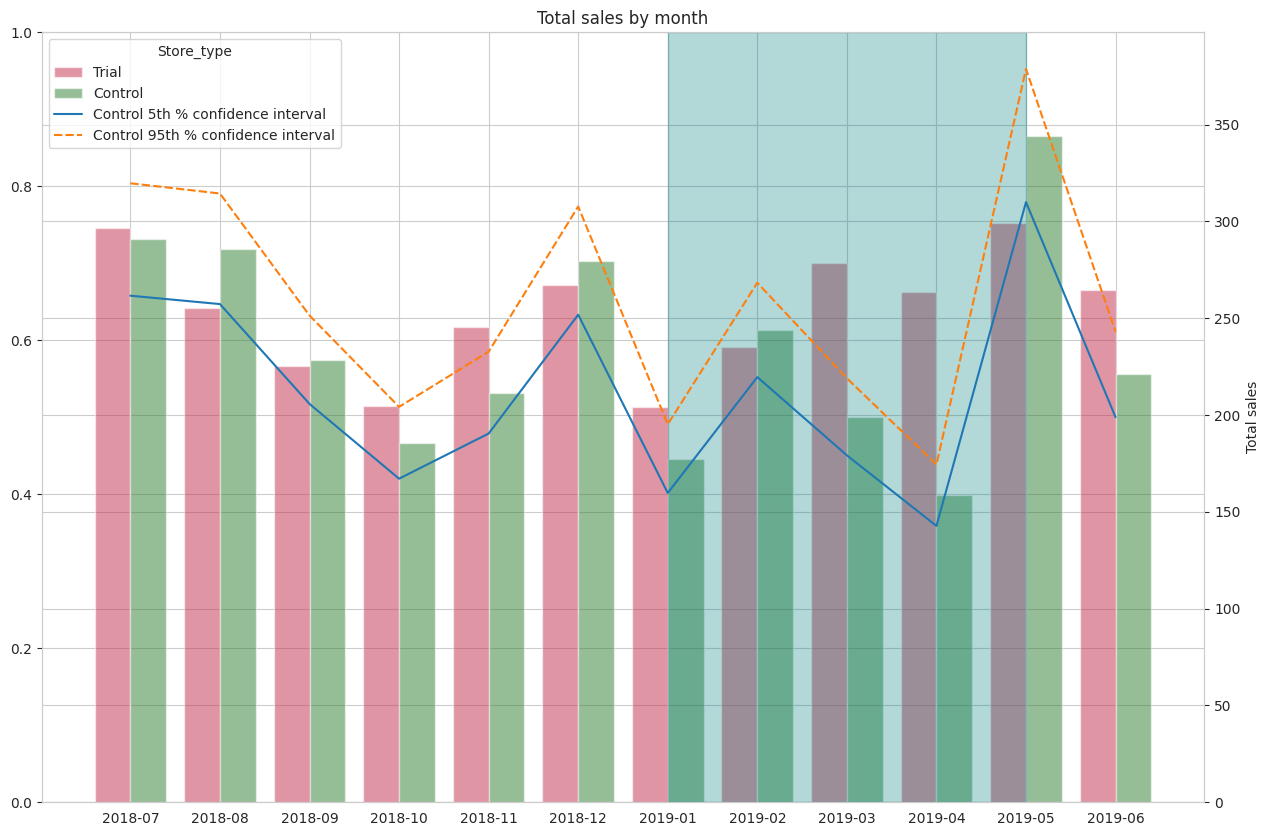

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(data=bardata,x=bardata.index,y=bardata['totSales'],hue=bardata['Store_type'],palette=['crimson','forestgreen'],alpha=0.5)
ax2 = sns.lineplot(data=linedata)
ax1.axvspan(xmin='2019-01', xmax='2019-05',  color="teal", alpha=0.3)
plt.xlabel("Month of Operation", fontsize=20)
plt.ylabel('Total sales')
plt.title('Total sales by month')


### *Store 86*

In [ ]:
scalingFactorForControlSales_86 = (preTrialMeasures[preTrialMeasures['STORE_NBR'] == 86]['totSales'].sum()) / (preTrialMeasures[preTrialMeasures['STORE_NBR']==155]['totSales'].sum())
scalingFactorForControlSales_86

0.9700651481287743

In [ ]:
scaledControlSales_86 = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == 155)]
scaledControlSales_86

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
1793,155,201807,924.6,101,1.217822,2.475248,3.698400
1794,155,201808,782.7,91,1.307692,2.516484,3.417904
1795,155,201809,1014.4,103,1.398058,2.815534,3.497931
1796,155,201810,963.8,108,1.259259,2.518519,3.543382
1797,155,201811,898.8,101,1.316832,2.673267,3.328889
1798,155,201812,849.8,97,1.237113,2.494845,3.511570
1799,155,201901,874.6,96,1.302083,2.625000,3.470635


In [ ]:
scaledControlSales_86["controlSales"] = scaledControlSales_86["totSales"] * scalingFactorForControlSales_86
scaledControlSales_86

<ipython-input-260-17f521da5b20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_86["controlSales"] = scaledControlSales_86["totSales"] * scalingFactorForControlSales_86


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
1793,155,201807,924.6,101,1.217822,2.475248,3.698400,896.922236
1794,155,201808,782.7,91,1.307692,2.516484,3.417904,759.269991
1795,155,201809,1014.4,103,1.398058,2.815534,3.497931,984.034086
1796,155,201810,963.8,108,1.259259,2.518519,3.543382,934.948790
1797,155,201811,898.8,101,1.316832,2.673267,3.328889,871.894555
1798,155,201812,849.8,97,1.237113,2.494845,3.511570,824.361363
1799,155,201901,874.6,96,1.302083,2.625000,3.470635,848.418979


In [ ]:
trialSales_86 = measureoverTime[measureoverTime['STORE_NBR'] == 86].reset_index(drop=True)
scaledControlSales_86 = scaledControlSales_86.reset_index(drop=True)
percentDiffS_86 = pd.concat([trialSales_86["MONTH_ID"],trialSales_86["totSales"],scaledControlSales_86["controlSales"]],axis=1)
percentDiffS_86.columns=["MONTH_ID","trialSales","controlSales"]
percentDiffS_86["percentDiffS"]= (abs(percentDiffS_86["trialSales"]-percentDiffS_86["controlSales"]))/percentDiffS_86["controlSales"]
percentDiffS_86

,MONTH_ID,trialSales,controlSales,percentDiffS
0,201807,892.20,896.922236,0.005265
1,201808,764.05,759.269991,0.006296
2,201809,914.60,984.034086,0.070561
3,201810,948.40,934.948790,0.014387
4,201811,918.00,871.894555,0.052880
5,201812,841.20,824.361363,0.020426
6,201901,841.40,848.418979,0.008273
7,201902,913.20,NaN,NaN
8,201903,1026.80,NaN,NaN
9,201904,848.20,NaN,NaN


In [ ]:
stdS_86 = percentDiffS_86[percentDiffS_86["MONTH_ID"]<201902]["percentDiffS"].std()
stdS_86

0.025833952854772368

In [ ]:
dof = 7
percentDiffS_86['tValue'] = (percentDiffS_86['percentDiffS'] - 0) / stdS_86
percentDiffS_86

,MONTH_ID,trialSales,controlSales,percentDiffS,tValue
0,201807,892.20,896.922236,0.005265,0.203799
1,201808,764.05,759.269991,0.006296,0.243692
2,201809,914.60,984.034086,0.070561,2.731315
3,201810,948.40,934.948790,0.014387,0.556907
4,201811,918.00,871.894555,0.052880,2.046904
5,201812,841.20,824.361363,0.020426,0.790676
6,201901,841.40,848.418979,0.008273,0.320238
7,201902,913.20,NaN,NaN,NaN
8,201903,1026.80,NaN,NaN,NaN
9,201904,848.20,NaN,NaN,NaN


In [ ]:
measureoverTimeSales_86 = measureoverTime
pastSales_86 = measureoverTimeSales_86

trial_store = 86
control_store = 155
store_type = []
for i in pastSales_86["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_86["Store_type"] = store_type

In [ ]:
pastSales_86['TransactionMonth'] = pd.to_datetime(pastSales_86['MONTH_ID'], format='%Y%m')
pastSales_86 = pastSales_86.loc[pastSales_86['Store_type'].isin(['Control','Trial'])]
pastSales_86 = pastSales_86.loc[:,['TransactionMonth','totSales','Store_type']]
pastSales_86

,TransactionMonth,totSales,Store_type
977,2018-07-01,892.20,Trial
978,2018-08-01,764.05,Trial
979,2018-09-01,914.60,Trial
980,2018-10-01,948.40,Trial
981,2018-11-01,918.00,Trial
982,2018-12-01,841.20,Trial
983,2019-01-01,841.40,Trial
984,2019-02-01,913.20,Trial
985,2019-03-01,1026.80,Trial
986,2019-04-01,848.20,Trial


In [ ]:
pastSales_Controls95_86 = pastSales_86[pastSales_86['Store_type'] == "Control"]
pastSales_Controls95_86['totSales'] = pastSales_Controls95_86['totSales'] * (1 + (stdS_86 * 2))
pastSales_Controls95_86['Store_type'] = "Control 95th % confidence interval"
pastSales_Controls95_86.head(10)

<ipython-input-266-e8536291fd57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_86['totSales'] = pastSales_Controls95_86['totSales'] * (1 + (stdS_86 * 2))
<ipython-input-266-e8536291fd57>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_86['Store_type'] = "Control 95th % confidence interval"


,TransactionMonth,totSales,Store_type
1793,2018-07-01,972.372146,Control 95th % confidence interval
1794,2018-08-01,823.140470,Control 95th % confidence interval
1795,2018-09-01,1066.811924,Control 95th % confidence interval
1796,2018-10-01,1013.597528,Control 95th % confidence interval
1797,2018-11-01,945.239114,Control 95th % confidence interval
1798,2018-12-01,893.707386,Control 95th % confidence interval
1799,2019-01-01,919.788750,Control 95th % confidence interval
1800,2019-02-01,937.246438,Control 95th % confidence interval
1801,2019-03-01,845.961663,Control 95th % confidence interval
1802,2019-04-01,888.238713,Control 95th % confidence interval


In [ ]:
pastSales_Controls5_86 = pastSales_86[pastSales_86['Store_type'] == "Control"]
pastSales_Controls5_86['totSales'] = pastSales_Controls5_86['totSales'] * (1 - (stdS_86 * 2))
pastSales_Controls5_86['Store_type'] = "Control 5th % confidence interval"
pastSales_Controls5_86.head(10)

<ipython-input-267-64add9222da8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_86['totSales'] = pastSales_Controls5_86['totSales'] * (1 - (stdS_86 * 2))
<ipython-input-267-64add9222da8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_86['Store_type'] = "Control 5th % confidence interval"


,TransactionMonth,totSales,Store_type
1793,2018-07-01,876.827854,Control 5th % confidence interval
1794,2018-08-01,742.259530,Control 5th % confidence interval
1795,2018-09-01,961.988076,Control 5th % confidence interval
1796,2018-10-01,914.002472,Control 5th % confidence interval
1797,2018-11-01,852.360886,Control 5th % confidence interval
1798,2018-12-01,805.892614,Control 5th % confidence interval
1799,2019-01-01,829.411250,Control 5th % confidence interval
1800,2019-02-01,845.153562,Control 5th % confidence interval
1801,2019-03-01,762.838337,Control 5th % confidence interval
1802,2019-04-01,800.961287,Control 5th % confidence interval


In [ ]:
trialAstS_86 = pd.concat([pastSales_86,pastSales_Controls95_86,pastSales_Controls5_86])
trialAstS_86

,TransactionMonth,totSales,Store_type
977,2018-07-01,892.200000,Trial
978,2018-08-01,764.050000,Trial
979,2018-09-01,914.600000,Trial
980,2018-10-01,948.400000,Trial
981,2018-11-01,918.000000,Trial
982,2018-12-01,841.200000,Trial
983,2019-01-01,841.400000,Trial
984,2019-02-01,913.200000,Trial
985,2019-03-01,1026.800000,Trial
986,2019-04-01,848.200000,Trial


In [ ]:
bardata_86 =trialAstS_86
bardata_86['TransactionMonth'] = bardata_86['TransactionMonth'].dt.strftime('%Y-%m').astype('str')
bardata_86 = bardata_86.set_index('TransactionMonth')
bardata_86 = bardata_86.loc[(bardata_86['Store_type'] == 'Trial') | (bardata_86['Store_type'] == 'Control')]
bardata_86

,totSales,Store_type
TransactionMonth,,
2018-07,892.20,Trial
2018-08,764.05,Trial
2018-09,914.60,Trial
2018-10,948.40,Trial
2018-11,918.00,Trial
2018-12,841.20,Trial
2019-01,841.40,Trial
2019-02,913.20,Trial
2019-03,1026.80,Trial


In [ ]:
linedata_86 = trialAstS_86
linedata_86 = linedata_86.set_index(['TransactionMonth','Store_type'])['totSales'].unstack()
linedata_86 = linedata_86.iloc[:,[1,2]]
linedata_86

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,876.827854,972.372146
2018-08,742.259530,823.140470
2018-09,961.988076,1066.811924
2018-10,914.002472,1013.597528
2018-11,852.360886,945.239114
2018-12,805.892614,893.707386
2019-01,829.411250,919.788750
2019-02,845.153562,937.246438
2019-03,762.838337,845.961663


Text(0.5, 1.0, 'Total sales by month')

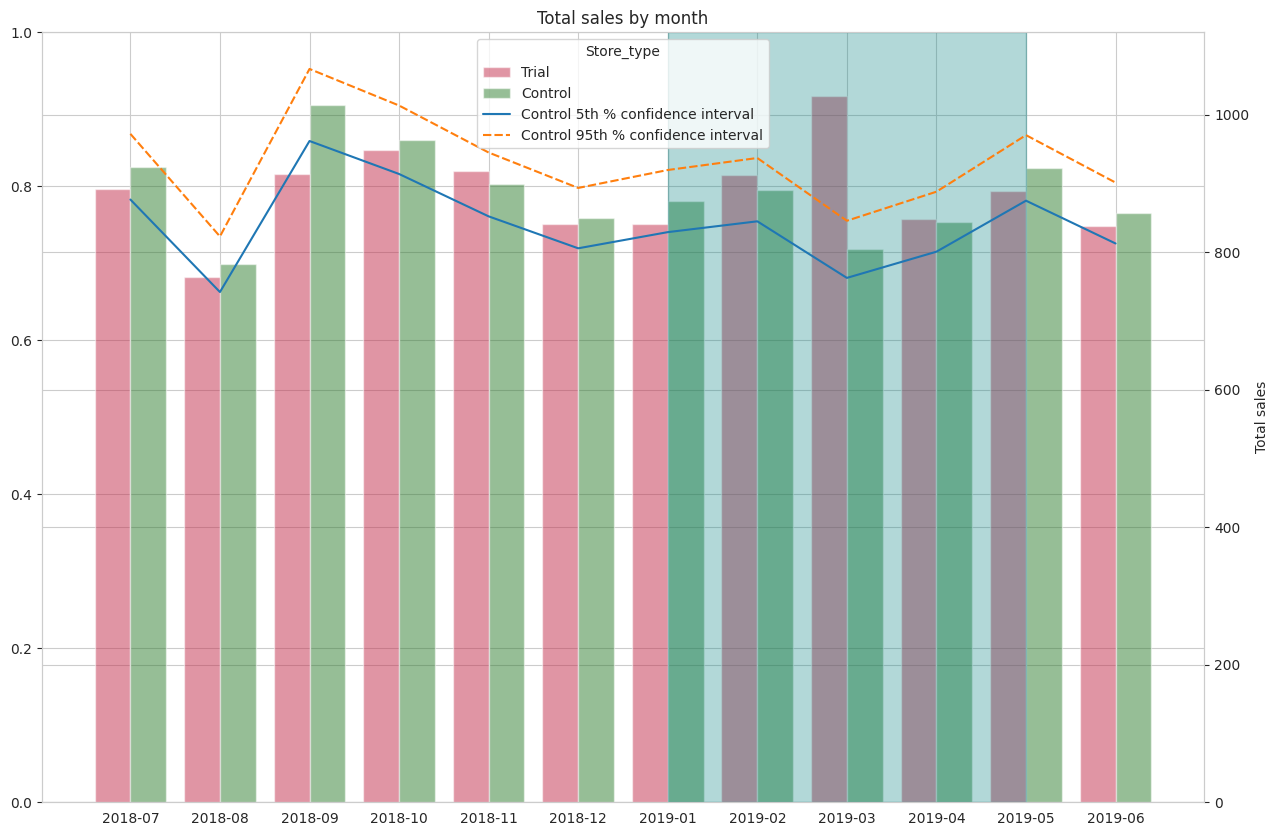

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(data=bardata_86,x=bardata_86.index,y=bardata_86['totSales'],hue=bardata_86['Store_type'],palette=['crimson','forestgreen'],alpha=0.5)
ax2 = sns.lineplot(data=linedata_86)
ax1.axvspan(xmin='2019-01', xmax='2019-05',  color="teal", alpha=0.3)
plt.xlabel("Month of Operation", fontsize=20)
plt.ylabel('Total sales')
plt.title('Total sales by month')


### *For Store 88*

In [ ]:
scalingFactorForControlSales_88 = (preTrialMeasures[preTrialMeasures['STORE_NBR'] == 88]['totSales'].sum()) / (preTrialMeasures[preTrialMeasures['STORE_NBR']==237]['totSales'].sum())
scalingFactorForControlSales_88

1.001558330664959

In [ ]:
scaledControlSales_88 = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == 237)]
scaledControlSales_88

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249


In [ ]:
scaledControlSales_88["controlSales"] = scaledControlSales_88["totSales"] * scalingFactorForControlSales_88
scaledControlSales_88

<ipython-input-274-ad6d6b2a455d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_88["controlSales"] = scaledControlSales_88["totSales"] * scalingFactorForControlSales_88


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370,1450.657086
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968,1369.931485
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074,1324.260425
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365,1350.401097
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500,1399.777923
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163,1266.971288
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249,1221.600696


In [ ]:
trialSales_88 = measureoverTime[measureoverTime['STORE_NBR'] == 88].reset_index(drop=True)
scaledControlSales_88 = scaledControlSales_88.reset_index(drop=True)
percentDiffS_88 = pd.concat([trialSales_88["MONTH_ID"],trialSales_88["totSales"],scaledControlSales_88["controlSales"]],axis=1)
percentDiffS_88.columns=["MONTH_ID","trialSales","controlSales"]
percentDiffS_88["percentDiffS"]= (abs(percentDiffS_88["trialSales"]-percentDiffS_88["controlSales"]))/percentDiffS_88["controlSales"]
percentDiffS_88

,MONTH_ID,trialSales,controlSales,percentDiffS
0,201807,1310.00,1450.657086,0.096961
1,201808,1323.80,1369.931485,0.033674
2,201809,1423.00,1324.260425,0.074562
3,201810,1352.40,1350.401097,0.001480
4,201811,1382.80,1399.777923,0.012129
5,201812,1325.20,1266.971288,0.045959
6,201901,1266.40,1221.600696,0.036673
7,201902,1370.20,NaN,NaN
8,201903,1477.20,NaN,NaN
9,201904,1439.40,NaN,NaN


In [ ]:
stdS_88 = percentDiffS_88[percentDiffS_88["MONTH_ID"]<201902]["percentDiffS"].std()
stdS_88

0.0334678673030788

In [ ]:
dof = 7
percentDiffS_88['tValue'] = (percentDiffS_88['percentDiffS'] - 0) / stdS_88
percentDiffS_88

,MONTH_ID,trialSales,controlSales,percentDiffS,tValue
0,201807,1310.00,1450.657086,0.096961,2.897136
1,201808,1323.80,1369.931485,0.033674,1.006168
2,201809,1423.00,1324.260425,0.074562,2.227870
3,201810,1352.40,1350.401097,0.001480,0.044228
4,201811,1382.80,1399.777923,0.012129,0.362408
5,201812,1325.20,1266.971288,0.045959,1.373227
6,201901,1266.40,1221.600696,0.036673,1.095756
7,201902,1370.20,NaN,NaN,NaN
8,201903,1477.20,NaN,NaN,NaN
9,201904,1439.40,NaN,NaN,NaN


In [ ]:
measureoverTimeSales_88 = measureoverTime
pastSales_88 = measureoverTimeSales_88

trial_store = 88
control_store = 237
store_type = []
for i in pastSales_88["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_88["Store_type"] = store_type

In [ ]:
pastSales_88['TransactionMonth'] = pd.to_datetime(pastSales_88['MONTH_ID'], format='%Y%m')
pastSales_88 = pastSales_88.loc[pastSales_88['Store_type'].isin(['Control','Trial'])]
pastSales_88 = pastSales_88.loc[:,['TransactionMonth','totSales','Store_type']]
pastSales_88

,TransactionMonth,totSales,Store_type
1001,2018-07-01,1310.00,Trial
1002,2018-08-01,1323.80,Trial
1003,2018-09-01,1423.00,Trial
1004,2018-10-01,1352.40,Trial
1005,2018-11-01,1382.80,Trial
1006,2018-12-01,1325.20,Trial
1007,2019-01-01,1266.40,Trial
1008,2019-02-01,1370.20,Trial
1009,2019-03-01,1477.20,Trial
1010,2019-04-01,1439.40,Trial


In [ ]:
pastSales_Controls95_88 = pastSales_88[pastSales_88['Store_type'] == "Control"]
pastSales_Controls95_88['totSales'] = pastSales_Controls95_88['totSales'] * (1 + (stdS_88 * 2))
pastSales_Controls95_88['Store_type'] = "Control 95th % confidence interval"
pastSales_Controls95_88.head(10)

<ipython-input-280-292191e0cf24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_88['totSales'] = pastSales_Controls95_88['totSales'] * (1 + (stdS_88 * 2))
<ipython-input-280-292191e0cf24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_88['Store_type'] = "Control 95th % confidence interval"


,TransactionMonth,totSales,Store_type
2747,2018-07-01,1545.349718,Control 95th % confidence interval
2748,2018-08-01,1459.354698,Control 95th % confidence interval
2749,2018-09-01,1410.702428,Control 95th % confidence interval
2750,2018-10-01,1438.549451,Control 95th % confidence interval
2751,2018-11-01,1491.149383,Control 95th % confidence interval
2752,2018-12-01,1349.673704,Control 95th % confidence interval
2753,2019-01-01,1301.341515,Control 95th % confidence interval
2754,2019-02-01,1498.831320,Control 95th % confidence interval
2755,2019-03-01,1289.071755,Control 95th % confidence interval
2756,2019-04-01,1285.230786,Control 95th % confidence interval


In [ ]:
pastSales_Controls5_88 = pastSales_88[pastSales_88['Store_type'] == "Control"]
pastSales_Controls5_88['totSales'] = pastSales_Controls5_88['totSales'] * (1 - (stdS_88 * 2))
pastSales_Controls5_88['Store_type'] = "Control 5th % confidence interval"
pastSales_Controls5_88.head(10)

<ipython-input-281-f439159c2133>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_88['totSales'] = pastSales_Controls5_88['totSales'] * (1 - (stdS_88 * 2))
<ipython-input-281-f439159c2133>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_88['Store_type'] = "Control 5th % confidence interval"


,TransactionMonth,totSales,Store_type
2747,2018-07-01,1351.450282,Control 5th % confidence interval
2748,2018-08-01,1276.245302,Control 5th % confidence interval
2749,2018-09-01,1233.697572,Control 5th % confidence interval
2750,2018-10-01,1258.050549,Control 5th % confidence interval
2751,2018-11-01,1304.050617,Control 5th % confidence interval
2752,2018-12-01,1180.326296,Control 5th % confidence interval
2753,2019-01-01,1138.058485,Control 5th % confidence interval
2754,2019-02-01,1310.768680,Control 5th % confidence interval
2755,2019-03-01,1127.328245,Control 5th % confidence interval
2756,2019-04-01,1123.969214,Control 5th % confidence interval


In [ ]:
trialAstS_88 = pd.concat([pastSales_88,pastSales_Controls95_88,pastSales_Controls5_88])
trialAstS_88

,TransactionMonth,totSales,Store_type
1001,2018-07-01,1310.000000,Trial
1002,2018-08-01,1323.800000,Trial
1003,2018-09-01,1423.000000,Trial
1004,2018-10-01,1352.400000,Trial
1005,2018-11-01,1382.800000,Trial
1006,2018-12-01,1325.200000,Trial
1007,2019-01-01,1266.400000,Trial
1008,2019-02-01,1370.200000,Trial
1009,2019-03-01,1477.200000,Trial
1010,2019-04-01,1439.400000,Trial


In [ ]:
bardata_88 =trialAstS_88
bardata_88['TransactionMonth'] = bardata_88['TransactionMonth'].dt.strftime('%Y-%m').astype('str')
bardata_88 = bardata_88.set_index('TransactionMonth')
bardata_88 = bardata_88.loc[(bardata_88['Store_type'] == 'Trial') | (bardata_88['Store_type'] == 'Control')]
bardata_88

,totSales,Store_type
TransactionMonth,,
2018-07,1310.00,Trial
2018-08,1323.80,Trial
2018-09,1423.00,Trial
2018-10,1352.40,Trial
2018-11,1382.80,Trial
2018-12,1325.20,Trial
2019-01,1266.40,Trial
2019-02,1370.20,Trial
2019-03,1477.20,Trial


In [ ]:
linedata_88 = trialAstS_88
linedata_88 = linedata_88.set_index(['TransactionMonth','Store_type'])['totSales'].unstack()
linedata_88 = linedata_88.iloc[:,[1,2]]
linedata_88

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,1351.450282,1545.349718
2018-08,1276.245302,1459.354698
2018-09,1233.697572,1410.702428
2018-10,1258.050549,1438.549451
2018-11,1304.050617,1491.149383
2018-12,1180.326296,1349.673704
2019-01,1138.058485,1301.341515
2019-02,1310.768680,1498.831320
2019-03,1127.328245,1289.071755


Text(0.5, 1.0, 'Total sales by month')

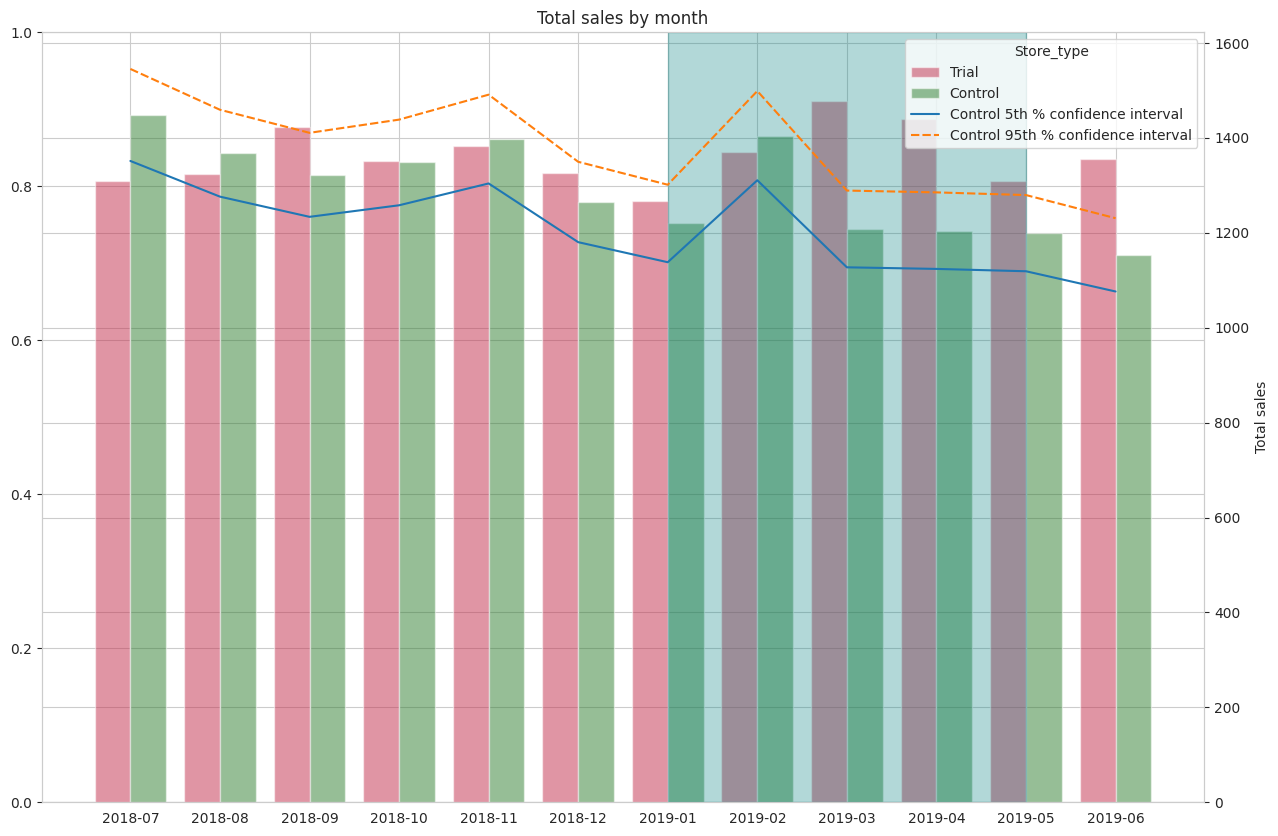

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(data=bardata_88,x=bardata_88.index,y=bardata_88['totSales'],hue=bardata_88['Store_type'],palette=['crimson','forestgreen'],alpha=0.5)
ax2 = sns.lineplot(data=linedata_88)
ax1.axvspan(xmin='2019-01', xmax='2019-05',  color="teal", alpha=0.3)
plt.xlabel("Month of Operation", fontsize=20)
plt.ylabel('Total sales')
plt.title('Total sales by month')


### Let's have a look at assessing this for number of customers as well.

### *For Store 77*

In [ ]:
scalingFactorForControlCust_77 = (preTrialMeasures[preTrialMeasures['STORE_NBR'] == 77]['nCustomers'].sum()) / (preTrialMeasures[preTrialMeasures['STORE_NBR']==233]['nCustomers'].sum())
scalingFactorForControlCust_77

1.0033557046979866

In [ ]:
scaledControlCust_77 = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == 233)]
scaledControlCust_77

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
2699,233,201807,290.7,51,1.058824,1.725490,3.303409
2700,233,201808,285.9,48,1.041667,1.666667,3.573750
2701,233,201809,228.6,42,1.071429,1.666667,3.265714
2702,233,201810,185.7,35,1.028571,1.600000,3.316071
2703,233,201811,211.6,40,1.025000,1.550000,3.412903
2704,233,201812,279.8,47,1.063830,1.595745,3.730667
2705,233,201901,177.5,35,1.000000,1.342857,3.776596


In [ ]:
scaledControlCust_77["controlCust"] = scaledControlCust_77["nCustomers"] * scalingFactorForControlCust_77
scaledControlCust_77

<ipython-input-288-331be9b8bca6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCust_77["controlCust"] = scaledControlCust_77["nCustomers"] * scalingFactorForControlCust_77


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlCust
2699,233,201807,290.7,51,1.058824,1.725490,3.303409,51.171141
2700,233,201808,285.9,48,1.041667,1.666667,3.573750,48.161074
2701,233,201809,228.6,42,1.071429,1.666667,3.265714,42.140940
2702,233,201810,185.7,35,1.028571,1.600000,3.316071,35.117450
2703,233,201811,211.6,40,1.025000,1.550000,3.412903,40.134228
2704,233,201812,279.8,47,1.063830,1.595745,3.730667,47.157718
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,35.117450


In [ ]:
trialCust_77 = measureoverTime[measureoverTime['STORE_NBR'] == 77].reset_index(drop=True)
scaledControlCust_77 = scaledControlCust_77.reset_index(drop=True)
percentDiffCust_77 = pd.concat([trialCust_77["MONTH_ID"],trialCust_77["nCustomers"],scaledControlCust_77["controlCust"]],axis=1)
percentDiffCust_77.columns=["MONTH_ID","trialCust","controlCust"]
percentDiffCust_77["percentDiffCust"]= (abs(percentDiffCust_77["trialCust"]-percentDiffCust_77["controlCust"]))/percentDiffCust_77["controlCust"]
percentDiffCust_77

,MONTH_ID,trialCust,controlCust,percentDiffCust
0,201807,51,51.171141,0.003344
1,201808,47,48.161074,0.024108
2,201809,42,42.140940,0.003344
3,201810,37,35.117450,0.053607
4,201811,41,40.134228,0.021572
5,201812,46,47.157718,0.024550
6,201901,35,35.117450,0.003344
7,201902,45,NaN,NaN
8,201903,50,NaN,NaN
9,201904,47,NaN,NaN


In [ ]:
stdCust_77 = percentDiffCust_77[percentDiffCust_77["MONTH_ID"]<201902]["percentDiffCust"].std()
stdCust_77

0.01824074855824395

In [ ]:
dof = 7
percentDiffCust_77['tValue'] = (percentDiffCust_77['percentDiffCust'] - 0) / stdCust_77
percentDiffCust_77

,MONTH_ID,trialCust,controlCust,percentDiffCust,tValue
0,201807,51,51.171141,0.003344,0.183352
1,201808,47,48.161074,0.024108,1.321664
2,201809,42,42.140940,0.003344,0.183352
3,201810,37,35.117450,0.053607,2.938874
4,201811,41,40.134228,0.021572,1.182622
5,201812,46,47.157718,0.024550,1.345883
6,201901,35,35.117450,0.003344,0.183352
7,201902,45,NaN,NaN,NaN
8,201903,50,NaN,NaN,NaN
9,201904,47,NaN,NaN,NaN


In [ ]:
measureoverTimeCust_77 = measureoverTime
pastCust_77 = measureoverTimeCust_77
trial_store = 77
control_store = 233
store_type = []
for i in pastCust_77["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastCust_77["Store_type"] = store_type

In [ ]:
pastCust_77['TransactionMonth'] = pd.to_datetime(pastCust_77['MONTH_ID'], format='%Y%m')
pastCust_77= pastCust_77.loc[pastCust_77['Store_type'].isin(['Control','Trial'])]
pastCust_77 = pastCust_77.loc[:,['TransactionMonth','nCustomers','Store_type']]
pastCust_77

,TransactionMonth,nCustomers,Store_type
880,2018-07-01,51,Trial
881,2018-08-01,47,Trial
882,2018-09-01,42,Trial
883,2018-10-01,37,Trial
884,2018-11-01,41,Trial
885,2018-12-01,46,Trial
886,2019-01-01,35,Trial
887,2019-02-01,45,Trial
888,2019-03-01,50,Trial
889,2019-04-01,47,Trial


In [ ]:
pastCust_Ctrlc95_77 = pastCust_77[pastCust_77['Store_type'] == "Control"]
pastCust_Ctrlc95_77['nCustomers'] = pastCust_Ctrlc95_77['nCustomers'] * (1 + (stdCust_77 * 2))
pastCust_Ctrlc95_77['Store_type'] = "Control 95th % confidence interval"
pastCust_Ctrlc95_77.head(10)

<ipython-input-294-11ad646cc247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc95_77['nCustomers'] = pastCust_Ctrlc95_77['nCustomers'] * (1 + (stdCust_77 * 2))
<ipython-input-294-11ad646cc247>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc95_77['Store_type'] = "Control 95th % confidence interval"


,TransactionMonth,nCustomers,Store_type
2699,2018-07-01,52.860556,Control 95th % confidence interval
2700,2018-08-01,49.751112,Control 95th % confidence interval
2701,2018-09-01,43.532223,Control 95th % confidence interval
2702,2018-10-01,36.276852,Control 95th % confidence interval
2703,2018-11-01,41.459260,Control 95th % confidence interval
2704,2018-12-01,48.714630,Control 95th % confidence interval
2705,2019-01-01,36.276852,Control 95th % confidence interval
2706,2019-02-01,46.641667,Control 95th % confidence interval
2707,2019-03-01,41.459260,Control 95th % confidence interval
2708,2019-04-01,31.094445,Control 95th % confidence interval


In [ ]:
pastCust_Ctrlc5_77 = pastCust_77[pastCust_77['Store_type'] == "Control"]
pastCust_Ctrlc5_77['nCustomers'] = pastCust_Ctrlc5_77['nCustomers'] * (1 - (stdCust_77 * 2))
pastCust_Ctrlc5_77['Store_type'] = "Control 5th % confidence interval"
pastCust_Ctrlc5_77.head(10)

<ipython-input-295-68400d35ea2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc5_77['nCustomers'] = pastCust_Ctrlc5_77['nCustomers'] * (1 - (stdCust_77 * 2))
<ipython-input-295-68400d35ea2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc5_77['Store_type'] = "Control 5th % confidence interval"


,TransactionMonth,nCustomers,Store_type
2699,2018-07-01,49.139444,Control 5th % confidence interval
2700,2018-08-01,46.248888,Control 5th % confidence interval
2701,2018-09-01,40.467777,Control 5th % confidence interval
2702,2018-10-01,33.723148,Control 5th % confidence interval
2703,2018-11-01,38.540740,Control 5th % confidence interval
2704,2018-12-01,45.285370,Control 5th % confidence interval
2705,2019-01-01,33.723148,Control 5th % confidence interval
2706,2019-02-01,43.358333,Control 5th % confidence interval
2707,2019-03-01,38.540740,Control 5th % confidence interval
2708,2019-04-01,28.905555,Control 5th % confidence interval


In [ ]:
trialAstCust_77 = pd.concat([pastCust_77,pastCust_Ctrlc95_77,pastCust_Ctrlc5_77])
trialAstCust_77

,TransactionMonth,nCustomers,Store_type
880,2018-07-01,51.000000,Trial
881,2018-08-01,47.000000,Trial
882,2018-09-01,42.000000,Trial
883,2018-10-01,37.000000,Trial
884,2018-11-01,41.000000,Trial
885,2018-12-01,46.000000,Trial
886,2019-01-01,35.000000,Trial
887,2019-02-01,45.000000,Trial
888,2019-03-01,50.000000,Trial
889,2019-04-01,47.000000,Trial


In [ ]:
bardatac_77 =trialAstCust_77
bardatac_77['TransactionMonth'] = bardatac_77['TransactionMonth'].dt.strftime('%Y-%m').astype('str')
bardatac_77 = bardatac_77.set_index('TransactionMonth')
bardatac_77 = bardatac_77.loc[(bardatac_77['Store_type'] == 'Trial') | (bardatac_77['Store_type'] == 'Control')]
bardatac_77

,nCustomers,Store_type
TransactionMonth,,
2018-07,51.0,Trial
2018-08,47.0,Trial
2018-09,42.0,Trial
2018-10,37.0,Trial
2018-11,41.0,Trial
2018-12,46.0,Trial
2019-01,35.0,Trial
2019-02,45.0,Trial
2019-03,50.0,Trial


In [ ]:
linedatac_77 = trialAstCust_77
linedatac_77 = linedatac_77.set_index(['TransactionMonth','Store_type'])['nCustomers'].unstack()
linedatac_77 = linedatac_77.iloc[:,[1,2]]
linedatac_77

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,49.139444,52.860556
2018-08,46.248888,49.751112
2018-09,40.467777,43.532223
2018-10,33.723148,36.276852
2018-11,38.540740,41.459260
2018-12,45.285370,48.714630
2019-01,33.723148,36.276852
2019-02,43.358333,46.641667
2019-03,38.540740,41.459260


Text(0.5, 1.0, 'Number of Customers by Month')

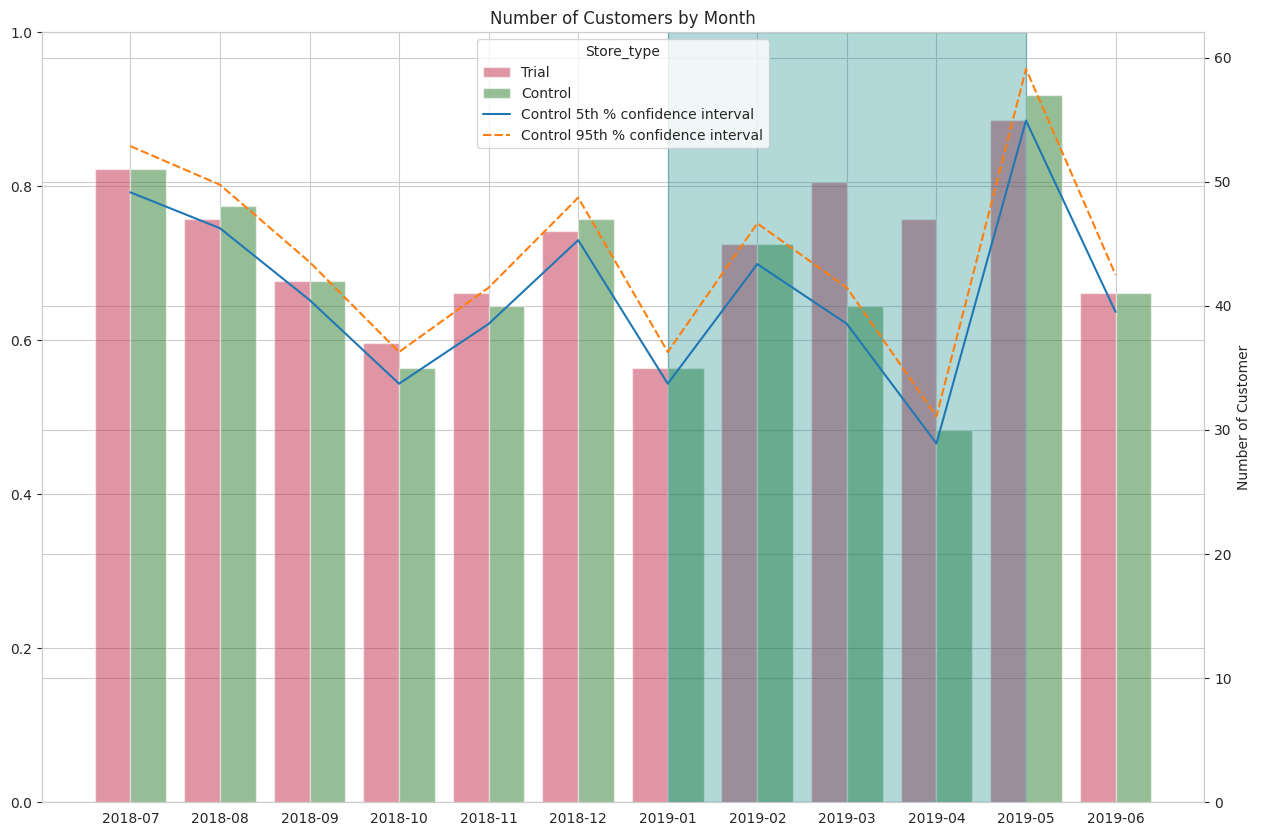

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(data=bardatac_77,x=bardatac_77.index,y=bardatac_77['nCustomers'],hue=bardatac_77['Store_type'],palette=['crimson','forestgreen'],alpha=0.5)
ax2 = sns.lineplot(data=linedatac_77)
ax1.axvspan(xmin='2019-01', xmax='2019-05',  color="teal", alpha=0.3)
plt.xlabel("Month of Operation", fontsize=20)
plt.ylabel('Number of Customer')
plt.title('Number of Customers by Month')


### *For Store 88*

In [ ]:
scalingFactorForControlCust_86 = (preTrialMeasures[preTrialMeasures['STORE_NBR'] == 86]['nCustomers'].sum()) / (preTrialMeasures[preTrialMeasures['STORE_NBR']==155]['nCustomers'].sum())
scalingFactorForControlCust_86

1.0

In [ ]:
scaledControlCust_86 = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == 155)]
scaledControlCust_86

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
1793,155,201807,924.6,101,1.217822,2.475248,3.698400
1794,155,201808,782.7,91,1.307692,2.516484,3.417904
1795,155,201809,1014.4,103,1.398058,2.815534,3.497931
1796,155,201810,963.8,108,1.259259,2.518519,3.543382
1797,155,201811,898.8,101,1.316832,2.673267,3.328889
1798,155,201812,849.8,97,1.237113,2.494845,3.511570
1799,155,201901,874.6,96,1.302083,2.625000,3.470635


In [ ]:
scaledControlCust_86["controlCust"] = scaledControlCust_86["nCustomers"] * scalingFactorForControlCust_86
scaledControlCust_86

<ipython-input-302-3e6238ab2db0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCust_86["controlCust"] = scaledControlCust_86["nCustomers"] * scalingFactorForControlCust_86


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlCust
1793,155,201807,924.6,101,1.217822,2.475248,3.698400,101.0
1794,155,201808,782.7,91,1.307692,2.516484,3.417904,91.0
1795,155,201809,1014.4,103,1.398058,2.815534,3.497931,103.0
1796,155,201810,963.8,108,1.259259,2.518519,3.543382,108.0
1797,155,201811,898.8,101,1.316832,2.673267,3.328889,101.0
1798,155,201812,849.8,97,1.237113,2.494845,3.511570,97.0
1799,155,201901,874.6,96,1.302083,2.625000,3.470635,96.0


In [ ]:
trialCust_86 = measureoverTime[measureoverTime['STORE_NBR'] == 86].reset_index(drop=True)
scaledControlCust_86 = scaledControlCust_86.reset_index(drop=True)
percentDiffCust_86 = pd.concat([trialCust_86["MONTH_ID"],trialCust_86["nCustomers"],scaledControlCust_86["controlCust"]],axis=1)
percentDiffCust_86.columns=["MONTH_ID","trialCust","controlCust"]
percentDiffCust_86["percentDiffCust"]= (abs(percentDiffCust_86["trialCust"]-percentDiffCust_86["controlCust"]))/percentDiffCust_86["controlCust"]
percentDiffCust_86

,MONTH_ID,trialCust,controlCust,percentDiffCust
0,201807,99,101.0,0.019802
1,201808,94,91.0,0.032967
2,201809,103,103.0,0.000000
3,201810,109,108.0,0.009259
4,201811,100,101.0,0.009901
5,201812,98,97.0,0.010309
6,201901,94,96.0,0.020833
7,201902,107,NaN,NaN
8,201903,115,NaN,NaN
9,201904,105,NaN,NaN


In [ ]:
stdCust_86 = percentDiffCust_86[percentDiffCust_86["MONTH_ID"]<201902]["percentDiffCust"].std()
stdCust_86

0.010687444701395238

In [ ]:
dof = 7
percentDiffCust_86['tValue'] = (percentDiffCust_86['percentDiffCust'] - 0) / stdCust_86
percentDiffCust_86

,MONTH_ID,trialCust,controlCust,percentDiffCust,tValue
0,201807,99,101.0,0.019802,1.852826
1,201808,94,91.0,0.032967,3.084651
2,201809,103,103.0,0.000000,0.000000
3,201810,109,108.0,0.009259,0.866368
4,201811,100,101.0,0.009901,0.926413
5,201812,98,97.0,0.010309,0.964616
6,201901,94,96.0,0.020833,1.949328
7,201902,107,NaN,NaN,NaN
8,201903,115,NaN,NaN,NaN
9,201904,105,NaN,NaN,NaN


In [ ]:
measureoverTimeCust_86 = measureoverTime
pastCust_86 = measureoverTimeCust_86
trial_store = 86
control_store = 155
store_type = []
for i in pastCust_86["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastCust_86["Store_type"] = store_type

In [ ]:
pastCust_86['TransactionMonth'] = pd.to_datetime(pastCust_86['MONTH_ID'], format='%Y%m')
pastCust_86= pastCust_86.loc[pastCust_86['Store_type'].isin(['Control','Trial'])]
pastCust_86 = pastCust_86.loc[:,['TransactionMonth','nCustomers','Store_type']]
pastCust_86

,TransactionMonth,nCustomers,Store_type
977,2018-07-01,99,Trial
978,2018-08-01,94,Trial
979,2018-09-01,103,Trial
980,2018-10-01,109,Trial
981,2018-11-01,100,Trial
982,2018-12-01,98,Trial
983,2019-01-01,94,Trial
984,2019-02-01,107,Trial
985,2019-03-01,115,Trial
986,2019-04-01,105,Trial


In [ ]:
pastCust_Ctrlc95_86 = pastCust_86[pastCust_86['Store_type'] == "Control"]
pastCust_Ctrlc95_86['nCustomers'] = pastCust_Ctrlc95_86['nCustomers'] * (1 + (stdCust_86  * 2))
pastCust_Ctrlc95_86['Store_type'] = "Control 95th % confidence interval"
pastCust_Ctrlc95_86.head(10)

<ipython-input-308-1ef085b1af89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc95_86['nCustomers'] = pastCust_Ctrlc95_86['nCustomers'] * (1 + (stdCust_86  * 2))
<ipython-input-308-1ef085b1af89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc95_86['Store_type'] = "Control 95th % confidence interval"


,TransactionMonth,nCustomers,Store_type
1793,2018-07-01,103.158864,Control 95th % confidence interval
1794,2018-08-01,92.945115,Control 95th % confidence interval
1795,2018-09-01,105.201614,Control 95th % confidence interval
1796,2018-10-01,110.308488,Control 95th % confidence interval
1797,2018-11-01,103.158864,Control 95th % confidence interval
1798,2018-12-01,99.073364,Control 95th % confidence interval
1799,2019-01-01,98.051989,Control 95th % confidence interval
1800,2019-02-01,97.030614,Control 95th % confidence interval
1801,2019-03-01,96.009240,Control 95th % confidence interval
1802,2019-04-01,101.116114,Control 95th % confidence interval


In [ ]:
pastCust_Ctrlc5_86 = pastCust_86[pastCust_86['Store_type'] == "Control"]
pastCust_Ctrlc5_86['nCustomers'] = pastCust_Ctrlc5_86['nCustomers'] * (1 - (stdCust_86 * 2))
pastCust_Ctrlc5_86['Store_type'] = "Control 5th % confidence interval"
pastCust_Ctrlc5_86.head(10)

<ipython-input-309-f7029bd4be2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc5_86['nCustomers'] = pastCust_Ctrlc5_86['nCustomers'] * (1 - (stdCust_86 * 2))
<ipython-input-309-f7029bd4be2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc5_86['Store_type'] = "Control 5th % confidence interval"


,TransactionMonth,nCustomers,Store_type
1793,2018-07-01,98.841136,Control 5th % confidence interval
1794,2018-08-01,89.054885,Control 5th % confidence interval
1795,2018-09-01,100.798386,Control 5th % confidence interval
1796,2018-10-01,105.691512,Control 5th % confidence interval
1797,2018-11-01,98.841136,Control 5th % confidence interval
1798,2018-12-01,94.926636,Control 5th % confidence interval
1799,2019-01-01,93.948011,Control 5th % confidence interval
1800,2019-02-01,92.969386,Control 5th % confidence interval
1801,2019-03-01,91.990760,Control 5th % confidence interval
1802,2019-04-01,96.883886,Control 5th % confidence interval


In [ ]:
trialAstCust_86 = pd.concat([pastCust_86,pastCust_Ctrlc95_86,pastCust_Ctrlc5_86])
trialAstCust_86

,TransactionMonth,nCustomers,Store_type
977,2018-07-01,99.000000,Trial
978,2018-08-01,94.000000,Trial
979,2018-09-01,103.000000,Trial
980,2018-10-01,109.000000,Trial
981,2018-11-01,100.000000,Trial
982,2018-12-01,98.000000,Trial
983,2019-01-01,94.000000,Trial
984,2019-02-01,107.000000,Trial
985,2019-03-01,115.000000,Trial
986,2019-04-01,105.000000,Trial


In [ ]:
bardatac_86 =trialAstCust_86
bardatac_86['TransactionMonth'] = bardatac_86['TransactionMonth'].dt.strftime('%Y-%m').astype('str')
bardatac_86 = bardatac_86.set_index('TransactionMonth')
bardatac_86 = bardatac_86.loc[(bardatac_86['Store_type'] == 'Trial') | (bardatac_86['Store_type'] == 'Control')]
bardatac_86

,nCustomers,Store_type
TransactionMonth,,
2018-07,99.0,Trial
2018-08,94.0,Trial
2018-09,103.0,Trial
2018-10,109.0,Trial
2018-11,100.0,Trial
2018-12,98.0,Trial
2019-01,94.0,Trial
2019-02,107.0,Trial
2019-03,115.0,Trial


In [ ]:
linedatac_86 = trialAstCust_86
linedatac_86 = linedatac_86.set_index(['TransactionMonth','Store_type'])['nCustomers'].unstack()
linedatac_86 = linedatac_86.iloc[:,[1,2]]
linedatac_86

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,98.841136,103.158864
2018-08,89.054885,92.945115
2018-09,100.798386,105.201614
2018-10,105.691512,110.308488
2018-11,98.841136,103.158864
2018-12,94.926636,99.073364
2019-01,93.948011,98.051989
2019-02,92.969386,97.030614
2019-03,91.990760,96.009240


Text(0.5, 1.0, 'Number of Customers by Month')

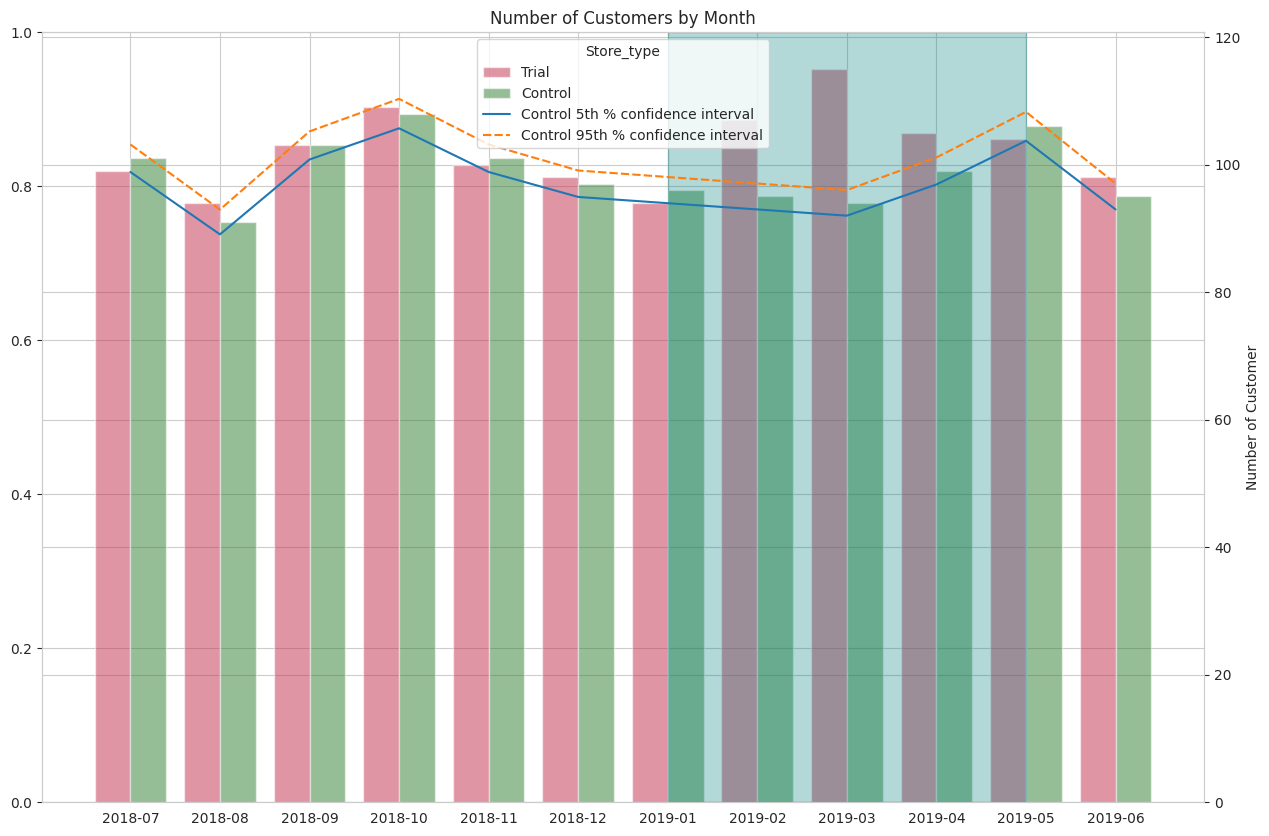

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(data=bardatac_86,x=bardatac_86.index,y=bardatac_86['nCustomers'],hue=bardatac_86['Store_type'],palette=['crimson','forestgreen'],alpha=0.5)
ax2 = sns.lineplot(data=linedatac_86)
ax1.axvspan(xmin='2019-01', xmax='2019-05',  color="teal", alpha=0.3)
plt.xlabel("Month of Operation", fontsize=20)
plt.ylabel('Number of Customer')
plt.title('Number of Customers by Month')


### *For Store 88*

In [ ]:
scalingFactorForControlCust_88 = (preTrialMeasures[preTrialMeasures['STORE_NBR'] == 88]['nCustomers'].sum()) / (preTrialMeasures[preTrialMeasures['STORE_NBR']==237]['nCustomers'].sum())
scalingFactorForControlCust_88

0.9943502824858758

In [ ]:
scaledControlCust_88 = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == 237)]
scaledControlCust_88

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249


In [ ]:
scaledControlCust_88["controlCust"] = scaledControlCust_88["nCustomers"] * scalingFactorForControlCust_88
scaledControlCust_88

<ipython-input-316-4eb3e52ca9c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlCust_88["controlCust"] = scaledControlCust_88["nCustomers"] * scalingFactorForControlCust_88


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlCust
2747,237,201807,1448.4,128,1.265625,2.531250,4.470370,127.276836
2748,237,201808,1367.8,135,1.222222,2.318519,4.369968,134.237288
2749,237,201809,1322.2,126,1.182540,2.373016,4.422074,125.288136
2750,237,201810,1348.3,123,1.195122,2.430894,4.509365,122.305085
2751,237,201811,1397.6,132,1.219697,2.424242,4.367500,131.254237
2752,237,201812,1265.0,124,1.161290,2.330645,4.377163,123.299435
2753,237,201901,1219.7,117,1.188034,2.367521,4.403249,116.338983


In [ ]:
trialCust_88 = measureoverTime[measureoverTime['STORE_NBR'] == 88].reset_index(drop=True)
scaledControlCust_88 = scaledControlCust_88.reset_index(drop=True)
percentDiffCust_88 = pd.concat([trialCust_88["MONTH_ID"],trialCust_88["nCustomers"],scaledControlCust_88["controlCust"]],axis=1)
percentDiffCust_88.columns=["MONTH_ID","trialCust","controlCust"]
percentDiffCust_88["percentDiffCust"]= (abs(percentDiffCust_88["trialCust"]-percentDiffCust_88["controlCust"]))/percentDiffCust_88["controlCust"]
percentDiffCust_88

,MONTH_ID,trialCust,controlCust,percentDiffCust
0,201807,129,127.276836,0.013539
1,201808,131,134.237288,0.024116
2,201809,124,125.288136,0.010281
3,201810,123,122.305085,0.005682
4,201811,130,131.254237,0.009556
5,201812,126,123.299435,0.021902
6,201901,117,116.338983,0.005682
7,201902,124,NaN,NaN
8,201903,134,NaN,NaN
9,201904,128,NaN,NaN


In [ ]:
stdCust_88 = percentDiffCust_88[percentDiffCust_88["MONTH_ID"]<201902]["percentDiffCust"].std()
stdCust_88

0.00741024435207507

In [ ]:
dof = 7
percentDiffCust_88['tValue'] = (percentDiffCust_88['percentDiffCust'] - 0) / stdCust_88
percentDiffCust_88

,MONTH_ID,trialCust,controlCust,percentDiffCust,tValue
0,201807,129,127.276836,0.013539,1.827026
1,201808,131,134.237288,0.024116,3.254435
2,201809,124,125.288136,0.010281,1.387456
3,201810,123,122.305085,0.005682,0.766752
4,201811,130,131.254237,0.009556,1.289537
5,201812,126,123.299435,0.021902,2.955705
6,201901,117,116.338983,0.005682,0.766752
7,201902,124,NaN,NaN,NaN
8,201903,134,NaN,NaN,NaN
9,201904,128,NaN,NaN,NaN


In [ ]:
measureoverTimeCust_88 = measureoverTime
pastCust_88 = measureoverTimeCust_88
trial_store = 88
control_store = 237
store_type = []
for i in pastCust_88["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastCust_88["Store_type"] = store_type

In [ ]:
pastCust_88['TransactionMonth'] = pd.to_datetime(pastCust_88['MONTH_ID'], format='%Y%m')
pastCust_88 = pastCust_88.loc[pastCust_88['Store_type'].isin(['Control','Trial'])]
pastCust_88 = pastCust_88.loc[:,['TransactionMonth','nCustomers','Store_type']]
pastCust_88

,TransactionMonth,nCustomers,Store_type
1001,2018-07-01,129,Trial
1002,2018-08-01,131,Trial
1003,2018-09-01,124,Trial
1004,2018-10-01,123,Trial
1005,2018-11-01,130,Trial
1006,2018-12-01,126,Trial
1007,2019-01-01,117,Trial
1008,2019-02-01,124,Trial
1009,2019-03-01,134,Trial
1010,2019-04-01,128,Trial


In [ ]:
pastCust_Ctrlc95_88 = pastCust_88[pastCust_88['Store_type'] == "Control"]
pastCust_Ctrlc95_88['nCustomers'] = pastCust_Ctrlc95_88['nCustomers'] * (1 + (stdCust_88  * 2))
pastCust_Ctrlc95_88['Store_type'] = "Control 95th % confidence interval"
pastCust_Ctrlc95_88.head(10)

<ipython-input-322-3ccfb07295c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc95_88['nCustomers'] = pastCust_Ctrlc95_88['nCustomers'] * (1 + (stdCust_88  * 2))
<ipython-input-322-3ccfb07295c7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc95_88['Store_type'] = "Control 95th % confidence interval"


,TransactionMonth,nCustomers,Store_type
2747,2018-07-01,129.897023,Control 95th % confidence interval
2748,2018-08-01,137.000766,Control 95th % confidence interval
2749,2018-09-01,127.867382,Control 95th % confidence interval
2750,2018-10-01,124.822920,Control 95th % confidence interval
2751,2018-11-01,133.956305,Control 95th % confidence interval
2752,2018-12-01,125.837741,Control 95th % confidence interval
2753,2019-01-01,118.733997,Control 95th % confidence interval
2754,2019-02-01,127.867382,Control 95th % confidence interval
2755,2019-03-01,120.763638,Control 95th % confidence interval
2756,2019-04-01,121.778459,Control 95th % confidence interval


In [ ]:
pastCust_Ctrlc5_88 = pastCust_88[pastCust_88['Store_type'] == "Control"]
pastCust_Ctrlc5_88['nCustomers'] = pastCust_Ctrlc5_88['nCustomers'] * (1 - (stdCust_88 * 2))
pastCust_Ctrlc5_88['Store_type'] = "Control 5th % confidence interval"
pastCust_Ctrlc5_88.head(10)

<ipython-input-323-b39e854877b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc5_88['nCustomers'] = pastCust_Ctrlc5_88['nCustomers'] * (1 - (stdCust_88 * 2))
<ipython-input-323-b39e854877b2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastCust_Ctrlc5_88['Store_type'] = "Control 5th % confidence interval"


,TransactionMonth,nCustomers,Store_type
2747,2018-07-01,126.102977,Control 5th % confidence interval
2748,2018-08-01,132.999234,Control 5th % confidence interval
2749,2018-09-01,124.132618,Control 5th % confidence interval
2750,2018-10-01,121.177080,Control 5th % confidence interval
2751,2018-11-01,130.043695,Control 5th % confidence interval
2752,2018-12-01,122.162259,Control 5th % confidence interval
2753,2019-01-01,115.266003,Control 5th % confidence interval
2754,2019-02-01,124.132618,Control 5th % confidence interval
2755,2019-03-01,117.236362,Control 5th % confidence interval
2756,2019-04-01,118.221541,Control 5th % confidence interval


In [ ]:
trialAstCust_88 = pd.concat([pastCust_88,pastCust_Ctrlc95_88,pastCust_Ctrlc5_88])
trialAstCust_88

,TransactionMonth,nCustomers,Store_type
1001,2018-07-01,129.000000,Trial
1002,2018-08-01,131.000000,Trial
1003,2018-09-01,124.000000,Trial
1004,2018-10-01,123.000000,Trial
1005,2018-11-01,130.000000,Trial
1006,2018-12-01,126.000000,Trial
1007,2019-01-01,117.000000,Trial
1008,2019-02-01,124.000000,Trial
1009,2019-03-01,134.000000,Trial
1010,2019-04-01,128.000000,Trial


In [ ]:
bardatac_88 =trialAstCust_88
bardatac_88['TransactionMonth'] = bardatac_88['TransactionMonth'].dt.strftime('%Y-%m').astype('str')
bardatac_88 = bardatac_88.set_index('TransactionMonth')
bardatac_88 = bardatac_88.loc[(bardatac_88['Store_type'] == 'Trial') | (bardatac_88['Store_type'] == 'Control')]
bardatac_88

,nCustomers,Store_type
TransactionMonth,,
2018-07,129.0,Trial
2018-08,131.0,Trial
2018-09,124.0,Trial
2018-10,123.0,Trial
2018-11,130.0,Trial
2018-12,126.0,Trial
2019-01,117.0,Trial
2019-02,124.0,Trial
2019-03,134.0,Trial


In [ ]:
linedatac_88 = trialAstCust_88
linedatac_88 = linedatac_88.set_index(['TransactionMonth','Store_type'])['nCustomers'].unstack()
linedatac_88 = linedatac_88.iloc[:,[1,2]]
linedatac_88

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,126.102977,129.897023
2018-08,132.999234,137.000766
2018-09,124.132618,127.867382
2018-10,121.177080,124.822920
2018-11,130.043695,133.956305
2018-12,122.162259,125.837741
2019-01,115.266003,118.733997
2019-02,124.132618,127.867382
2019-03,117.236362,120.763638


Text(0.5, 1.0, 'Number of Customers by Month')

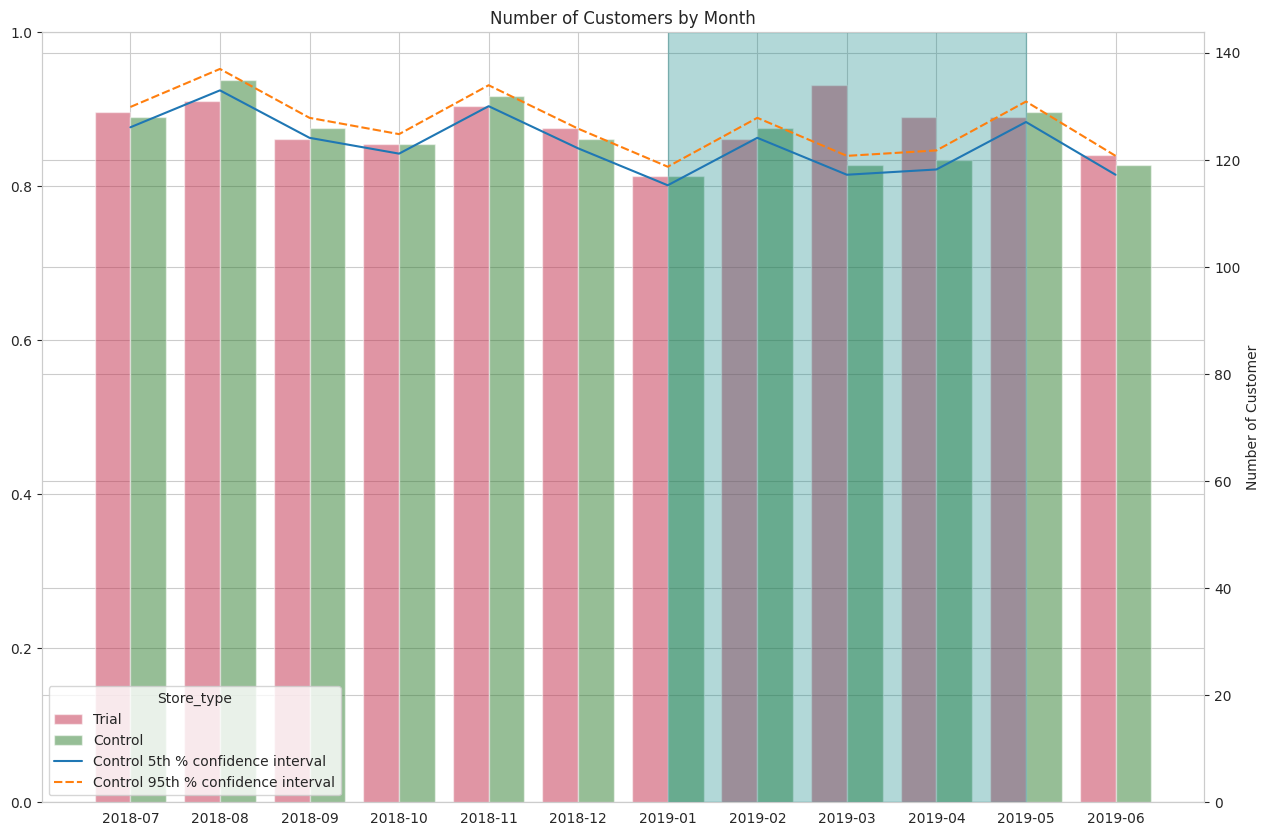

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(data=bardatac_88,x=bardatac_88.index,y=bardatac_88['nCustomers'],hue=bardatac_88['Store_type'],palette=['crimson','forestgreen'],alpha=0.5)
ax2 = sns.lineplot(data=linedatac_88)
ax1.axvspan(xmin='2019-01', xmax='2019-05',  color="teal", alpha=0.3)
plt.xlabel("Month of Operation", fontsize=20)
plt.ylabel('Number of Customer')
plt.title('Number of Customers by Month')


The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in
sales.